<a href="https://colab.research.google.com/github/gassantos/evolvedtree/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing the Exploratory Data Analysis

In [ ]:
!pip install -U seaborn deap mpld3 PyDrive joblib yellowbrick lime mlxtend eli5 shap

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.0)
     |████████████████████████████████| 163kB 12.0MB/s 
     |████████████████████████████████| 798kB 24.2MB/s 
Requirement already up-to-date: PyDrive in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: joblib in /usr/local/lib/python3.6/dist-packages (0.14.1)
     |████████████████████████████████| 266kB 49.4MB/s 
     |████████████████████████████████| 276kB 64.5MB/s 
     |████████████████████████████████| 1.3MB 52.6MB/s 
     |████████████████████████████████| 112kB 68.0MB/s 
     |████████████████████████████████| 266kB 59.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=52647911cf0fe644b65543df026990c51d36674a5bd6c210a2456c3af54899ff
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for lime: filename=lime-0.1.1.37-cp36-none-any.whl size=284277 sha

# Integrating to Google Drive

In [ ]:
# Code to read csv file into Colaboratory
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
avaliacao = 'https://drive.google.com/open?id=1BtGtywgoKFQq6Xt8BRli9t4iyXdLwf2c'
_, id = avaliacao.split('=')

upLoad = drive.CreateFile({'id':id}) 
upLoad.GetContentFile('DATASET_ALUNOS_FORMADOS-EVADIDOS_2015-2017.csv')
!ls -lh

total 796K
-rw-r--r-- 1 root root 2.7K Feb 26 05:01 adc.json
-rw-r--r-- 1 root root 785K Feb 26 05:01 DATASET_ALUNOS_FORMADOS-EVADIDOS_2015-2017.csv
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data


In [ ]:
dataset = 'https://drive.google.com/open?id=1GpEfcRdW0HBiMGxKQy1rMfyPpH9xPa9w'
_, id = dataset.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('DATASET_ALUNOS_FORMADOS-EVADIDOS_2012-2018_PTB.csv')

# Create directory to Images
!mkdir "Graficos"; mkdir "Modelos"

In [ ]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
from builtins import *

import time, collections
import itertools as itools
import graphviz as gvz
import pandas as pd
import numpy as np
import random as rdm
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus as pydot
import pickle as pkl

from sklearn import tree as T
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, StratifiedKFold as SKFold, GridSearchCV as gridSCV
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, cohen_kappa_score, precision_score
from sklearn.feature_selection import RFECV

from deap import creator, base, tools, algorithms
from scipy import interpolate, stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from joblib import dump, load

import itertools, graphviz, mpld3, requests, json, time, warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import platform, os
if platform.system() == 'Windows' :
    APP='C:/Program Files (x86)/Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + APP

In [ ]:
# Settings to Matplotlib    
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 8)

Populating the interactive namespace from numpy and matplotlib


# CEP das Localidades de Ensino da UFF

* CEP - VALONGUINHO:             24020140
* CEP - PRAIA VERMELHA:          24210200
* CEP - BIOMEDIO:                24210130
* CEP - MEDICINA:                24020071
* CEP - IACS:                    24210510
* CEP - REITORIA:                24220900
* CEP - ENGQUIMICA:              24210346
* CEP - VOLTA-REDONDA:           27213145
* CEP - MACAÉ:                   27930560
* CEP - RIO DAS OSTRAS:          28890000
* CEP - PETROPOLIS:              25650050
* CEP - SANTO ANTONIO DE PADUA:  28470000
* CEP - CAMPOS DOS GOYTACAZES:
* CEP - NOVA IGUAÇU:
* CEP - ANGRA DOS REIS:
* CEP - ITAPERUNA:
* CEP - MIRACEMA:
* CEP - PINHEIRAL:
* CEP - BOM JESUS DO ITABAPOANA:
* CEP - CABO FRIO:
* CEP - SÃO JOÃO DE MERITI:
* CEP - ARRAIAL DO CABO:
* CEP - QUISSAMÃ:
* CEP - NOVA FRIBURGO:
* CEP - PETRÓPOLIS:
* CEP - ORIXIMINÁ:

# Functions

### a) Plotting Confusion Matrix

In [ ]:
def plotConfusionMatrix(matrix, target_names, title="\nMatriz de Confusão\n", cmap=None, accuracy=None, normalize=True):
    
    if cmap is None:
        cmap = plb.get_cmap('Blues')

    #plb.figure(figsize=(18,8))
    plb.imshow(matrix, interpolation='nearest', cmap=cmap)
    #plb.title(title)
    plb.colorbar()

    if target_names is not None:
        marks = np.arange(len(target_names))
        plb.xticks(marks, target_names) #, rotation=30)
        plb.yticks(marks, target_names)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


    thresh = matrix.max() / 1.5 if normalize else matrix.max()
    for i, j in itools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        if normalize:
            plb.text(j, i, "{:0.2}".format(matrix[i, j]),
                     horizontalalignment="center",
                     color="red" if matrix[i, j] <= thresh else "red")
        else:
            plb.text(j, i, "{:,}".format(matrix[i, j]),
                     horizontalalignment="center",
                     color="red" if matrix[i, j] > thresh else "red")

    if accuracy is None:
        accuracy = np.trace(matrix) / float(np.sum(matrix))
    
    misclass = 1 - accuracy
    
    plb.figure(1)
    plb.tight_layout()
    plb.xlabel('accuracy={:0.6f}; misclass={:0.6f}'.format(accuracy, misclass))
    
    if normalize is True:
        plb.savefig('Graficos/matrizconf-norm.pdf')
    else:
        plb.savefig('Graficos/matrizconf.pdf')
    plb.show()

### b) Feature subset fitness function with Machine Learning Techniques

In [ ]:
def getFitnessMLT(individual, X_train, X_test, y_train, y_test):

    # Extracting feature columns that we do not use and apply category mapping to the features
    notFeatures = [idx for idx in range(len(individual)) if individual[idx] == 0]
    X_treinoNotFeatures = X_train.drop(X_train.columns[notFeatures], axis=1)
    X_treinoFeatures = pd.get_dummies(X_treinoNotFeatures)
    X_testeNotFeatures = X_test.drop(X_test.columns[notFeatures], axis=1)
    X_testeFeatures = pd.get_dummies(X_testeNotFeatures)

    # Remove any columns that not are in both the training and test sets
    comumFeatures = set(X_treinoFeatures.columns) & set(X_testeFeatures.columns)
    treinoFeatures = set(X_treinoFeatures.columns) - comumFeatures
    X_treinoFeatures = X_treinoFeatures.drop(list(treinoFeatures), axis=1)
    testeFeatures = set(X_testeFeatures.columns) - comumFeatures
    X_testeFeatures = X_testeFeatures.drop(list(testeFeatures), axis=1)

    # Apply Decision Tree on the data, and calculate accuracy
    clf = T.DecisionTreeClassifier()
    clf.fit(X_treinoFeatures, y_train)
    predictions = clf.predict(X_testeFeatures)
    accuracy = accuracy_score(y_test, predictions)
    
    # Return calculated accuracy as fitness
    return (accuracy, )

### c) Obtaining the Best Individuals  to Genetic Algorithm

In [ ]:
def getHof():

    # Initialize population
    numPop = 100
    numGen = 10
    pop = toolbox.population(n=numPop)
    hof = tools.HallOfFame(numPop * numGen)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Launch genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen, stats=stats, halloffame=hof, verbose=True)

    # Return the hall of fame
    return hof, pop, log

### c) Get list of percentiles in the hall of fame

In [ ]:
def percentHof(hof):
    percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
    return percentileList

### d) Get Accuracies List of the HOF (hall of fame)

In [ ]:
def getMetrics(hof):
    
    # Gather fitness data from each percentile
    testAccuracyList = []
    validationAccuracyList = []
    individualList = []
    
    for individual in hof:
        testAccuracy = individual.fitness.values
        validationAccuracy = getFitnessMLT(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
        testAccuracyList.append(testAccuracy[0])
        validationAccuracyList.append(validationAccuracy[0])
        individualList.append(individual)
    
    testAccuracyList.reverse()
    validationAccuracyList.reverse()
    individualList.reverse()
    
    return testAccuracyList, validationAccuracyList, individualList

### e) Function List Best Performance 

In [ ]:
def listBestPerformance(validAccList):
    
    maxValAccIndices = [] 
    maxValIndividuos = []
    maxBetterSubset = []
    maxWorseSubset = []
    
    for idx in range(len(validAccList)): 
        if validAccList[idx] == max(validAccList):
            maxValAccIndices = [idx]
            
    for idx in maxValAccIndices:
        maxValIndividuos = [individualList[idx]]
        
    for individual in maxValIndividuos:
        for index in range(len(individual)): 
            if individual[index] == 1:
                maxBetterSubset += [list(allFeatures)[index]]
            else: 
                maxWorseSubset += [list(allFeatures)[index]]
    
    return maxValAccIndices, maxValIndividuos, maxBetterSubset, maxWorseSubset

### f) Function Optimal Feature Subset

In [ ]:
def getWorseFeatures(validAccList):
    
    # Obtaining list of best performance individuals
    maxValAccIndices, maxValIndividuos, maxBetterSubset, maxWorseSubset = listBestPerformance(validAccList)

    bestIndividualList = []
    maxValidAccFS = None
    
    for idx in range(len(maxValAccIndices)): 
        maxValidAccFS = validAccList[maxValAccIndices[idx]]
        bestIndividualList = maxValIndividuos[idx]
    
    print('\nValidation Accuracy with AF: \t\t' +str(validationAccuracyAll[0]))
    print('Validation Accuracy with FS: \t\t' +str(maxValidAccFS))
    print('Best Individual: \t\t\t' +str(bestIndividualList))
    print('Number of Selected Features: \t\t' +str(len(maxBetterSubset)))
    print('Number of Not Selected Features: \t' +str(len(maxWorseSubset))+'\n')
    print('Set of Selected Features:\n' +str(maxBetterSubset)+'\n')
    print('Set of UnSelected Features:\n' +str(maxWorseSubset)+'\n')
    
    return maxWorseSubset

### g) Function Ranking of Best Individuals

In [ ]:
def getBestRanking(testAccList, validAccList, individualList):
    
    # Gather fitness data from each percentile
    testAccuracyRanking = []
    validationAccuracyRanking = []
    bestIndividualRanking = []
    
    # Variables for Accuracy List
    it = 0
    LIMIT = len(validAccList)
    
    # Iterations for Ranking of the Best Individuals
    for individual in individualList:
        testAccuracy = individual.fitness.values
        
        if it < LIMIT :
            if validAccList[it] >= 0.85 :
                testAccuracyRanking.append(testAccuracy[0])
                validationAccuracyRanking.append(validAccList[it])
                bestIndividualRanking.append(individual)
        else:
            break
        
        it=it+1
    
    return bestIndividualRanking, validationAccuracyRanking, testAccuracyRanking

### h) Function Optimal Number Features through sklearn.RFECV

In [ ]:
def getOptimalNumberFeatures(X, y):
    
    for c in X.columns:
        if X[c].dtype == 'object':
            lbl = LabelEncoder()
            lbl.fit(list(X[c].values))
            X[c] = lbl.transform(list(X[c].values))
    
    # The accuracy scoring is proportional to the number of correct classifications
    rfecv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=SKFold(10), scoring='accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plb.figure()
    plb.xlabel("Number of features selected", fontweight="bold")
    plb.ylabel("Cross validation score")
    plb.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plb.savefig('Graficos/rfecvnum-otimo-features.pdf')
    plb.show()
    
    return  rfecv.n_features_,

# Importando o Dataset de Alunos

In [ ]:
starTime = time.time()
data = pd.read_csv('DATASET_ALUNOS_FORMADOS-EVADIDOS_2012-2018_PTB.csv', sep=';')
data.shape

(281673, 32)

In [ ]:
data.columns

Index(['MATRICULA', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS',
       'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO'],
      dtype='object')

# 1) Primeiro teste será feito com todos os atributos

# 2) Em seguida, serão removidos os Atributos por menor Significância, conforme a ordem:
 * MOBILIDADE
 * TURNOATUAL
 * CODTURNOATUAL
 * COR
 * ACAOAFIRMATIVA
 * CHCURSADA
 * CR


In [ ]:
# 23 - Admininstração; 7 - Direito; 42 - Eng. Produção; 31 - Ciências da Computação;

flagCurso = False
if flagCurso :
    dataCurso = data.query('CURSO == 23 & ANOINGRESSO <= 2014') #
    print(dataCurso.shape)
    dataCurso.head()

else :
    dataCurso = data.copy()
    print(dataCurso.shape)
    dataCurso.head()

(281673, 32)


# 1) Descriptive Statistics

In [ ]:
### Dropping some features
dataCurso = dataCurso.drop(columns=['MATRICULA','PERIODODISC', 'DISCIPLINA', 'NOTADISC', 'RESULTDISC'])
dataCurso.head()

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,FORMADO
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,FORMADO
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,FORMADO
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,FORMADO
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO


In [ ]:
dataCurso.columns

Index(['ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS', 'ENEMNATURAIS',
       'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO', 'CODTURNOINGRESSO',
       'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'ANOINGRESSO', 'SEMESTREINGRESSO',
       'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO', 'IDADE', 'COR', 'BAIRRO',
       'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA', 'ESTADOCIVIL',
       'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO', 'STATUSFORMACAO'],
      dtype='object')

# Removing duplicates instances

In [ ]:
### Remove duplicates
dataCurso = dataCurso.drop_duplicates(keep='first')
print(dataCurso.shape)
dataCurso.head()

(12969, 27)


,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,FORMADO
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,FORMADO
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,FORMADO
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,FORMADO
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO


### 1) Ethnicity:

In [ ]:
dataCurso.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count  median       count  ...       median            count median
COR                                              ...                                     
AMARELA                  31  599.20          31  ...            0               31    4.0
BRANCA                 1850  603.50        1850  ...            0             1850    4.0
INDÍGENA                 12  584.60          12  ...            0               12    4.5
NEGRA                   632  582.20         632  ...            0              632    4.0
NÃO DECLARADO          9210  604.35        9210  ...            0             9210    4.0
PARDA                  1234  587.60        1234  ...            0             1234    4.0

[6 rows x 36 columns]

### 2) Gender:

In [ ]:
dataCurso.groupby(['SEXO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
             count  median       count  ...       median            count median
SEXO                                    ...                                     
F             6514  601.55        6514  ...            0             6514      4
M             6455  601.70        6455  ...            0             6455      4

[2 rows x 36 columns]

# Formas de Concorrências dos Candidatos à Graduação

* AC - Candidatos de ampla concorrência
* L1 - Candidatos com renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/12).
* L2 - Candidatos autodeclarados pretos, pardos ou indígenas, com renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).
* L3 - Candidatos que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12711/2012).
* L4 - Candidatos autodeclarados pretos, pardos ou indígenas que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).
* A1 - Candidatos que cursaram todo o ensino médio em estabelecimento da rede pública estadual ou municipal de qualquer unidade da federação, excluídos os colégios federais, universitários, militares e de aplicação podem participar da Política de Ação Afirmativa da UFF.
* A0 - Ampla concorrência
* L5 - Candidatos que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012). 
* L6 - Candidatos autodeclarados pretos, pardos ou indígenas que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012, tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012). 
* L9 - Candidatos com deficiência que tenham renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).
* L10 - Candidatos com deficiência autodeclarados pretos, pardos ou indígenas, que tenham renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).
* L13 - Candidatos com deficiência que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).
* L14 - Candidatos com deficiência autodeclarados pretos, pardos ou indígenas que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).


### 3) Social Programs:

In [ ]:
dataCurso.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                       770  593.40         770  ...            0              770      4
AC                     10313  605.80       10313  ...            0            10313      4
L1                       296  573.75         296  ...            0              296      4
L2                       694  580.60         694  ...            0              694      4
L3                       234  595.80         234  ...            0              234      4
L4                       662  587.80         662  ...            0              662      4

[6 rows x 36 columns]

In [ ]:
dataCurso.head(20)

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,FORMADO
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,FORMADO
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,FORMADO
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,FORMADO
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO
5,AC,662.7,632.7,618.4,680.9,680.0,62,8,8,INTEGRAL,2.20,2014,2,2018,2,22,NÃO DECLARADO,JARDIM ATLÂNTICO,74343500,GOIÂNIA,0,210,SOLTEIRO,0,5,F,EVADIDO
6,AC,530.5,564.2,465.2,442.4,680.0,62,8,8,INTEGRAL,5.50,2014,2,2018,2,22,NÃO DECLARADO,VILA CORTÊS,24890000,TANGUÁ,0,720,SOLTEIRO,0,5,F,EVADIDO
7,AC,637.8,618.8,603.2,704.7,760.0,263,4,4,NOTURNO,7.70,2013,2,2017,2,25,NÃO DECLARADO,TIJUCA,20511400,RIO DE JANEIRO,0,3062,SOLTEIRO,0,5,F,FORMADO
8,AC,674.1,680.5,719.1,820.0,760.0,16,8,8,INTEGRAL,8.60,2012,2,2018,1,29,NÃO DECLARADO,TIJUCA,20520053,RIO DE JANEIRO,0,9299,SOLTEIRO,1,7,F,FORMADO
9,AC,608.6,728.0,673.5,765.9,900.0,41,8,8,INTEGRAL,6.80,2013,1,2017,1,28,NÃO DECLARADO,SÃO MIGUEL,24445686,SÃO GONÇALO,0,4475,SOLTEIRO,0,5,F,FORMADO


### 4) Marital Status:

In [ ]:
dataCurso.groupby(['ESTADOCIVIL']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                    count median       count  ...       median            count median
ESTADOCIVIL                                   ...                                     
CASADO                407  588.2         407  ...            0              407      4
SOLTEIRO            12562  602.1       12562  ...            0            12562      4

[2 rows x 36 columns]

In [ ]:
print(dataCurso.shape)
dataUnique = dataCurso.drop_duplicates(keep='first')
print(dataUnique.shape)

(12969, 27)
(12969, 27)


In [ ]:
print(dataUnique.COR.dtype)
np.unique(dataUnique.COR, return_counts=True)

object


(array(['AMARELA', 'BRANCA', 'INDÍGENA', 'NEGRA', 'NÃO DECLARADO', 'PARDA'],
       dtype=object), array([  31, 1850,   12,  632, 9210, 1234]))

In [ ]:
print(dataUnique.ACAOAFIRMATIVA.dtype)
np.unique(dataUnique.ACAOAFIRMATIVA, return_counts=True)


object


(array(['A1', 'AC', 'L1', 'L2', 'L3', 'L4'], dtype=object),
 array([  770, 10313,   296,   694,   234,   662]))

In [ ]:
total, card = dataUnique.shape
dataUnique.head()

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,FORMADO
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,FORMADO
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,FORMADO
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,FORMADO
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO


# 2) Descriptive Analisys

In [ ]:
dataUnique.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000
mean,595.970753,632.583754,581.180307,666.798820,715.032385,119.783329,6.465572,6.113964,4.622602,2013.151207,1.405428,2015.480376,1.481533,27.008328,0.000231,1123.247282,0.032308,3.484771
std,56.472999,71.983098,70.952198,98.625808,134.002986,138.217583,2.544134,2.376232,3.137774,0.724052,0.490994,17.789275,0.499832,6.754092,0.019634,1466.133429,0.197037,1.805025
min,100.000000,0.000000,0.000000,100.000000,40.000000,1.000000,2.000000,1.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,1.000000
25%,566.500000,589.800000,540.500000,609.400000,620.000000,22.000000,4.000000,4.000000,1.700000,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.000000,60.000000,0.000000,1.000000
50%,601.600000,639.000000,587.000000,675.200000,720.000000,48.000000,8.000000,8.000000,4.700000,2013.000000,1.000000,2016.000000,1.000000,25.000000,0.000000,375.000000,0.000000,4.000000
75%,633.100000,682.400000,628.400000,734.300000,800.000000,241.000000,8.000000,8.000000,7.700000,2014.000000,2.000000,2017.000000,2.000000,28.000000,0.000000,1883.000000,0.000000,5.000000
max,786.000000,885.500000,845.200000,955.200000,1000.000000,562.000000,14.000000,14.000000,10.000000,2014.000000,2.000000,2018.000000,2.000000,98.000000,2.000000,9544.000000,3.000000,7.000000


In [ ]:
dataUnique.corr()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
ENEMLINGUAGEM,1.000000,0.618266,0.542347,0.442532,0.315434,-0.152503,0.089080,0.070035,0.141993,-0.036790,-0.136172,-0.003245,-0.000513,-0.085112,-0.001267,0.131874,0.018865,0.046331
ENEMHUMANAS,0.618266,1.000000,0.654553,0.519595,0.315335,-0.172172,0.075435,0.077885,0.094311,0.292282,-0.101107,-0.002611,0.006536,-0.065062,-0.005759,0.043292,-0.013671,-0.042232
ENEMNATURAIS,0.542347,0.654553,1.000000,0.698844,0.274603,-0.219482,0.126332,0.152802,0.103915,0.077794,-0.103404,-0.007302,0.030437,-0.198450,-0.007442,0.099088,0.013311,-0.004849
ENEMMATEMATICA,0.442532,0.519595,0.698844,1.000000,0.190344,-0.218357,0.084004,0.128394,0.067701,-0.001687,-0.089848,-0.006860,0.024591,-0.199216,0.001191,0.080972,0.014189,-0.008368
ENEMREDACAO,0.315434,0.315335,0.274603,0.190344,1.000000,-0.151809,0.101069,0.092961,0.139197,0.097357,-0.160597,-0.001178,0.020807,-0.105294,-0.010114,0.129363,0.008474,0.029732
CURSO,-0.152503,-0.172172,-0.219482,-0.218357,-0.151809,1.000000,-0.134013,-0.091854,0.003747,-0.017520,-0.038808,0.004164,-0.009998,0.092018,0.003656,-0.048624,0.001959,0.003289
CODTURNOINGRESSO,0.089080,0.075435,0.126332,0.084004,0.101069,-0.134013,1.000000,0.725507,0.076495,0.045002,0.007656,-0.000815,0.017738,-0.123861,0.000931,0.074700,0.014295,0.025909
CODTURNOATUAL,0.070035,0.077885,0.152802,0.128394,0.092961,-0.091854,0.725507,1.000000,-0.008767,0.072765,-0.006029,-0.008877,0.021444,-0.125045,0.002741,0.017810,0.007288,-0.048245
CR,0.141993,0.094311,0.103915,0.067701,0.139197,0.003747,0.076495,-0.008767,1.000000,-0.093145,-0.108587,0.045389,0.052736,-0.145779,0.013183,0.702870,0.037985,0.539021
ANOINGRESSO,-0.036790,0.292282,0.077794,-0.001687,0.097357,-0.017520,0.045002,0.072765,-0.093145,1.000000,-0.000010,0.019517,-0.006666,-0.115951,-0.007885,-0.234897,-0.094783,-0.226786


In [ ]:
dataEvadidos = dataUnique[dataUnique.STATUSFORMACAO == "EVADIDO"]
dataEvadidos

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO
5,AC,662.7,632.7,618.4,680.9,680.0,62,8,8,INTEGRAL,2.20,2014,2,2018,2,22,NÃO DECLARADO,JARDIM ATLÂNTICO,74343500,GOIÂNIA,0,210,SOLTEIRO,0,5,F,EVADIDO
6,AC,530.5,564.2,465.2,442.4,680.0,62,8,8,INTEGRAL,5.50,2014,2,2018,2,22,NÃO DECLARADO,VILA CORTÊS,24890000,TANGUÁ,0,720,SOLTEIRO,0,5,F,EVADIDO
10,AC,577.5,558.6,362.2,472.0,520.0,62,8,8,INTEGRAL,7.41,2014,2,2015,2,27,NÃO DECLARADO,MUTONDO,24450400,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO
11,AC,586.6,641.9,575.8,708.5,820.0,263,4,4,NOTURNO,3.40,2013,1,2017,2,25,NÃO DECLARADO,CENTRO,24020069,NITERÓI,0,1124,SOLTEIRO,0,5,M,EVADIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259048,AC,580.5,570.1,477.0,451.7,940.0,21,8,8,INTEGRAL,4.25,2014,1,2014,1,22,BRANCA,ROCHA,24421345,SÃO GONÇALO,0,60,SOLTEIRO,0,1,F,EVADIDO
261786,AC,667.0,774.3,697.0,799.4,680.0,41,8,8,INTEGRAL,0.00,2014,1,2014,1,32,NÃO DECLARADO,BARRA DA TIJUCA,22793060,RIO DE JANEIRO,0,1643,SOLTEIRO,0,1,M,EVADIDO
264305,AC,568.2,665.7,592.2,648.9,660.0,20,4,4,NOTURNO,0.00,2014,2,2014,2,34,NÃO DECLARADO,VILA VALQUEIRE,21330320,RIO DE JANEIRO,0,136,SOLTEIRO,0,1,F,EVADIDO
265343,AC,645.1,667.6,668.8,800.5,680.0,20,4,4,NOTURNO,0.00,2014,2,2014,2,23,BRANCA,GLÓRIA,20241220,RIO DE JANEIRO,0,0,SOLTEIRO,0,1,M,EVADIDO


In [ ]:
dataGraduados = dataUnique[dataUnique.STATUSFORMACAO == "FORMADO"]
dataGraduados

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,FORMADO
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,FORMADO
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,FORMADO
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,FORMADO
7,AC,637.8,618.8,603.2,704.7,760.0,263,4,4,NOTURNO,7.70,2013,2,2017,2,25,NÃO DECLARADO,TIJUCA,20511400,RIO DE JANEIRO,0,3062,SOLTEIRO,0,5,F,FORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42899,AC,550.0,580.7,553.7,568.3,780.0,14,8,8,INTEGRAL,8.20,2013,2,2017,2,23,NÃO DECLARADO,VALE DO SOL,24813015,ITABORAÍ,0,2750,SOLTEIRO,0,5,M,FORMADO
45478,L3,548.8,569.5,477.9,324.2,560.0,36,4,4,NOTURNO,4.40,2013,2,2015,2,37,NEGRA,JÓQUEI II,28020302,CAMPOS DOS GOYTACAZES,0,3753,SOLTEIRO,0,3,F,FORMADO
49812,AC,606.8,701.7,622.6,856.8,720.0,20,4,4,NOTURNO,7.79,2013,2,2014,2,33,NEGRA,IMBOASSU,24465220,SÃO GONÇALO,0,2962,CASADO,1,2,M,FORMADO
57389,L1,629.7,621.0,475.6,678.3,740.0,23,4,4,NOTURNO,8.90,2013,2,2017,1,25,NÃO DECLARADO,PIRATININGA,24350051,NITERÓI,0,3000,SOLTEIRO,0,5,F,FORMADO


In [ ]:
dataEvadidos.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.0,9852.000000,9852.000000,9852.000000
mean,592.817844,631.841210,579.548224,664.788764,707.823285,119.714068,6.444783,6.191027,3.504038,2013.236094,1.433516,2015.027812,1.461125,27.263398,0.0,379.624746,0.033293,2.996549
std,56.998083,71.674005,71.151597,98.925814,134.658249,135.872525,2.524692,2.366923,2.749327,0.726183,0.495585,20.384494,0.498715,7.117411,0.0,483.700578,0.205270,1.760041
min,100.000000,0.000000,0.000000,100.000000,100.000000,1.000000,2.000000,1.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,21.000000,0.0,0.000000,0.000000,1.000000
25%,563.375000,589.100000,538.300000,606.900000,620.000000,23.000000,4.000000,4.000000,0.800000,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.0,0.000000,0.000000,1.000000
50%,598.900000,638.700000,585.100000,673.700000,720.000000,48.000000,8.000000,8.000000,3.400000,2013.000000,1.000000,2015.000000,1.000000,25.000000,0.0,240.000000,0.000000,3.000000
75%,630.200000,681.025000,627.400000,733.200000,800.000000,241.000000,8.000000,8.000000,5.600000,2014.000000,2.000000,2017.000000,2.000000,28.000000,0.0,540.000000,0.000000,5.000000
max,786.000000,885.500000,845.200000,955.200000,1000.000000,562.000000,14.000000,14.000000,10.000000,2014.000000,2.000000,2018.000000,2.000000,98.000000,0.0,6070.000000,3.000000,7.000000


In [ ]:
dataGraduados.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.00000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000
mean,605.936253,634.930735,586.338884,673.152069,737.818415,120.002246,6.531280,5.870388,8.158085,2012.88290,1.316651,2016.910812,1.546038,26.202117,0.000962,3473.638434,0.029195,5.027911
std,53.582514,72.913331,70.080016,97.414852,129.314830,145.403563,2.603949,2.389512,0.786658,0.64796,0.465245,0.815685,0.497956,5.370624,0.040046,965.259702,0.168379,0.794027
min,100.000000,0.000000,0.000000,100.000000,40.000000,1.000000,2.000000,2.000000,2.900000,2012.00000,1.000000,2012.000000,1.000000,21.000000,0.000000,1770.000000,0.000000,1.000000
25%,575.800000,592.000000,547.700000,620.600000,660.000000,22.000000,4.000000,4.000000,7.700000,2012.00000,1.000000,2016.000000,1.000000,24.000000,0.000000,2884.000000,0.000000,5.000000
50%,611.600000,641.100000,592.300000,680.300000,740.000000,49.000000,8.000000,8.000000,8.300000,2013.00000,1.000000,2017.000000,2.000000,24.000000,0.000000,3199.000000,0.000000,5.000000
75%,641.000000,685.700000,631.500000,738.100000,840.000000,222.000000,8.000000,8.000000,8.700000,2013.00000,2.000000,2017.000000,2.000000,26.000000,0.000000,3798.000000,0.000000,6.000000
max,754.800000,859.900000,812.000000,955.200000,1000.000000,562.000000,14.000000,8.000000,9.800000,2014.00000,2.000000,2018.000000,2.000000,70.000000,2.000000,9544.000000,1.000000,7.000000


In [ ]:
dataEvadidos.groupby(['TEMPOPERMANENCIA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... CHCURSADA TRANCAMENTOS       
                         count  median       count  ...    median        count median
TEMPOPERMANENCIA                                    ...                              
1                         3338  599.15        3338  ...         0         3338      0
2                         1032  598.90        1032  ...       300         1032      0
3                         1105  601.40        1105  ...       380         1105      0
4                         1906  599.40        1906  ...       270         1906      0
5                         1751  595.00        1751  ...       440         1751      0
6                          614  599.00         614  ...       782          614      0
7                          106  610.60         106  ...      1140          106      0

[7 rows x 34 columns]

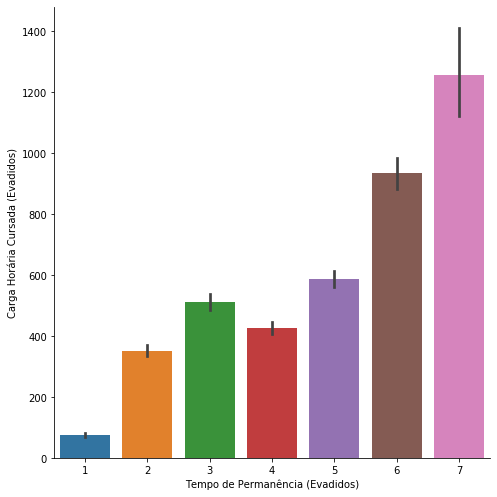

In [ ]:
#plb.plot(dataEvadidos.groupby(['TEMPOPERMANENCIA']))
g= sns.factorplot(x = "TEMPOPERMANENCIA", y = "CHCURSADA", data = dataEvadidos, kind = "bar", size = 7)
g.set_ylabels("Carga Horária Cursada (Evadidos)")
g.set_xlabels("Tempo de Permanência (Evadidos)")
plb.show()


In [ ]:
dataEvadidos.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count median       count  ...       median            count median
COR                                             ...                                     
AMARELA                  21  596.2          21  ...            0               21    2.0
BRANCA                 1302  600.8        1302  ...            0             1302    3.5
INDÍGENA                 11  578.3          11  ...            0               11    4.0
NEGRA                   473  582.1         473  ...            0              473    4.0
NÃO DECLARADO          7114  601.4        7114  ...            0             7114    3.0
PARDA                   931  585.4         931  ...            0              931    3.0

[6 rows x 36 columns]

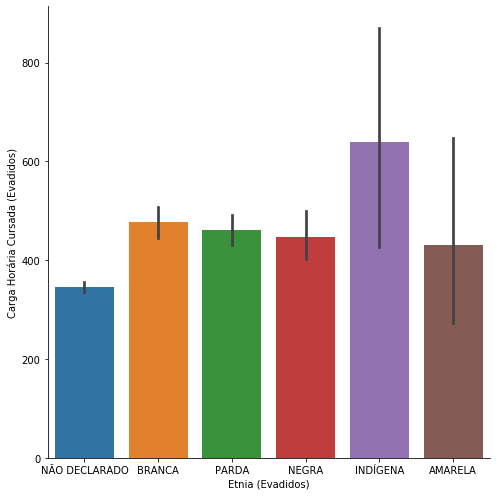

In [ ]:
g= sns.factorplot(x = "COR", y = "CHCURSADA", data = dataEvadidos, kind = "bar", size = 7)
g.set_ylabels("Carga Horária Cursada (Evadidos)")
g.set_xlabels("Etnia (Evadidos)")
plb.show()

In [ ]:
dataEvadidos.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                       579  592.90         579  ...            0              579    3.0
AC                      7723  602.40        7723  ...            0             7723    3.0
L1                       235  572.50         235  ...            0              235    3.0
L2                       571  580.40         571  ...            0              571    3.0
L3                       194  595.50         194  ...            0              194    2.5
L4                       550  587.05         550  ...            0              550    3.0

[6 rows x 36 columns]

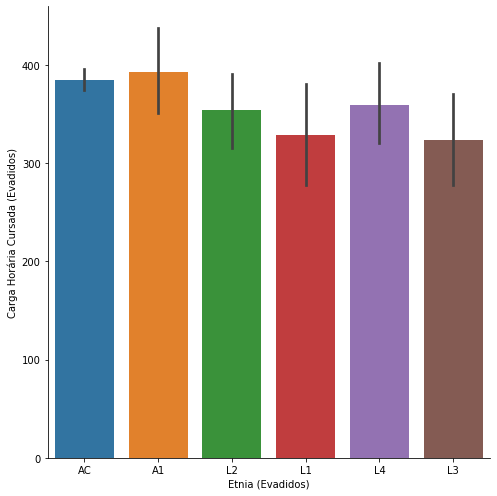

In [ ]:
g= sns.factorplot(x="ACAOAFIRMATIVA", y="CHCURSADA", data=dataEvadidos, kind="bar", size=7)
g.set_ylabels("Carga Horária Cursada (Evadidos)")
g.set_xlabels("Ação Afirmativa (Evadidos)")
plb.show()

In [ ]:
print("Dentre os evadidos,", len(dataEvadidos.query('CHCURSADA>=2000')),"alunos deixaram os estudos com uma Média de **Carga Horária** cursada de 2500 horas.")
print("Além disso,",len(dataEvadidos.query('CR>=6.0')), "de todos os evadidos tinham **CR** mediano de 7,4.")

Dentre os evadidos, 134 alunos deixaram os estudos com uma Média de **Carga Horária** cursada de 2500 horas.
Além disso, 2192 de todos os evadidos tinham **CR** mediano de 7,4.


In [ ]:
dataEvadidos.query('CHCURSADA>=2000').describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.00000,134.000000,134.000000
mean,603.741045,641.711194,604.891045,700.775373,734.626866,95.059701,7.089552,6.962687,6.394776,2013.007463,1.410448,2002.134328,1.395522,27.798507,0.0,2478.80597,0.022388,5.186567
std,49.784536,62.814977,62.871096,87.875536,120.004115,118.730425,1.861613,1.845159,1.729733,0.730601,0.493761,174.261872,0.505885,6.682690,0.0,526.22848,0.148497,1.221166
min,417.500000,442.700000,420.000000,392.800000,320.000000,1.000000,2.000000,2.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,22.000000,0.0,2007.00000,0.000000,1.000000
25%,581.875000,598.000000,569.125000,652.250000,660.000000,26.250000,8.000000,8.000000,5.525000,2012.000000,1.000000,2017.000000,1.000000,24.000000,0.0,2124.25000,0.000000,5.000000
50%,612.050000,643.900000,610.350000,713.600000,740.000000,45.000000,8.000000,8.000000,6.700000,2013.000000,1.000000,2017.000000,1.000000,25.000000,0.0,2318.50000,0.000000,5.000000
75%,633.850000,684.150000,644.550000,766.350000,820.000000,101.000000,8.000000,8.000000,7.575000,2014.000000,2.000000,2018.000000,2.000000,28.750000,0.0,2700.00000,0.000000,6.000000
max,761.600000,788.900000,738.400000,870.900000,980.000000,522.000000,14.000000,8.000000,9.500000,2014.000000,2.000000,2018.000000,2.000000,56.000000,0.0,6070.00000,1.000000,7.000000


In [ ]:
dataEvadidos.query('CR>=6.0').describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.0,2192.000000,2192.000000,2192.000000
mean,604.796852,647.454243,590.820484,673.949954,731.555657,122.024635,6.805657,6.333029,7.432482,2013.337591,1.386861,2014.633212,1.476734,26.200274,0.0,757.020985,0.043796,3.216241
std,50.606643,65.699481,69.928081,95.329689,126.476303,141.703937,2.600882,2.373874,0.939883,0.681697,0.487143,43.081568,0.500485,6.303342,0.0,586.182490,0.235773,1.621329
min,100.000000,0.000000,0.000000,100.000000,100.000000,1.000000,2.000000,1.000000,6.000000,2012.000000,1.000000,0.000000,0.000000,21.000000,0.0,15.000000,0.000000,1.000000
25%,577.300000,610.700000,550.475000,613.575000,640.000000,23.000000,4.000000,4.000000,6.620000,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.0,300.000000,0.000000,2.000000
50%,609.000000,653.600000,594.550000,679.950000,740.000000,49.000000,8.000000,8.000000,7.400000,2013.000000,1.000000,2015.000000,1.000000,24.000000,0.0,568.000000,0.000000,3.000000
75%,638.300000,693.400000,636.600000,740.100000,820.000000,243.000000,8.000000,8.000000,8.130000,2014.000000,2.000000,2017.000000,2.000000,26.000000,0.0,1051.000000,0.000000,5.000000
max,761.600000,814.700000,789.100000,955.200000,1000.000000,562.000000,14.000000,14.000000,10.000000,2014.000000,2.000000,2018.000000,2.000000,64.000000,0.0,6070.000000,3.000000,7.000000


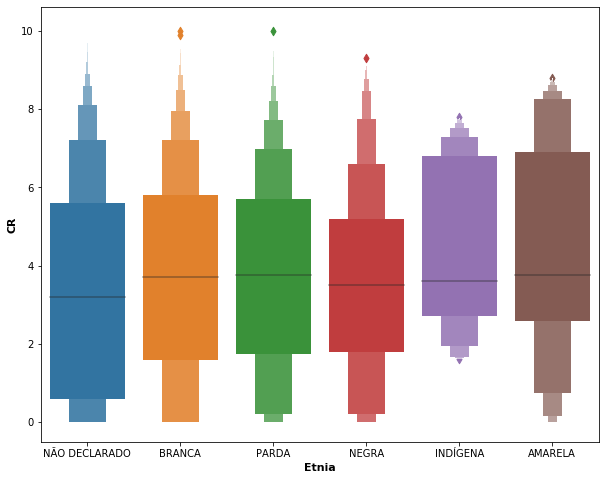

In [ ]:
plb.figure(figsize=(10,8))
sns.boxenplot(dataEvadidos.COR, dataEvadidos.CR)
plb.xlabel('Etnia', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.savefig('Graficos/boxenplot-cor-cr.pdf')
plb.show()

In [ ]:
dataEvadidos.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.0,9852.000000,9852.000000,9852.000000
mean,592.817844,631.841210,579.548224,664.788764,707.823285,119.714068,6.444783,6.191027,3.504038,2013.236094,1.433516,2015.027812,1.461125,27.263398,0.0,379.624746,0.033293,2.996549
std,56.998083,71.674005,71.151597,98.925814,134.658249,135.872525,2.524692,2.366923,2.749327,0.726183,0.495585,20.384494,0.498715,7.117411,0.0,483.700578,0.205270,1.760041
min,100.000000,0.000000,0.000000,100.000000,100.000000,1.000000,2.000000,1.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,21.000000,0.0,0.000000,0.000000,1.000000
25%,563.375000,589.100000,538.300000,606.900000,620.000000,23.000000,4.000000,4.000000,0.800000,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.0,0.000000,0.000000,1.000000
50%,598.900000,638.700000,585.100000,673.700000,720.000000,48.000000,8.000000,8.000000,3.400000,2013.000000,1.000000,2015.000000,1.000000,25.000000,0.0,240.000000,0.000000,3.000000
75%,630.200000,681.025000,627.400000,733.200000,800.000000,241.000000,8.000000,8.000000,5.600000,2014.000000,2.000000,2017.000000,2.000000,28.000000,0.0,540.000000,0.000000,5.000000
max,786.000000,885.500000,845.200000,955.200000,1000.000000,562.000000,14.000000,14.000000,10.000000,2014.000000,2.000000,2018.000000,2.000000,98.000000,0.0,6070.000000,3.000000,7.000000


In [ ]:
dataEvadidos.groupby(['CURSO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
CURSO                                    ...                                     
1                78  604.15          78  ...            0               78    3.5
2               177  616.90         177  ...            0              177    4.0
3                78  615.10          78  ...            0               78    2.5
4               198  622.60         198  ...            0              198    3.0
5                61  628.80          61  ...            0               61    3.0
...             ...     ...         ...  ...          ...              ...    ...
462             212  600.50         212  ...            0              212    3.0
502              38  557.85          38  ...            0               38    2.0
522              40  607.55          40  ...            0               40    4.0
523              52  586.05          52  ...            0               52    2.5
562              51  593.00          51  ...            0               51    2.0

[94 rows x 34 columns]

In [ ]:
dataEvadidos.groupby('SEXO').size()

SEXO
F    4496
M    5356
dtype: int64

In [ ]:
dataEvadidos.groupby('CURSO').size()

CURSO
1       78
2      177
3       78
4      198
5       61
      ... 
462    212
502     38
522     40
523     52
562     51
Length: 94, dtype: int64

In [ ]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 50): print(dataEvadidos)

       ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  \
4                  AC          545.4        560.9         508.2   
5                  AC          662.7        632.7         618.4   
6                  AC          530.5        564.2         465.2   
10                 AC          577.5        558.6         362.2   
11                 AC          586.6        641.9         575.8   
...               ...            ...          ...           ...   
259048             AC          580.5        570.1         477.0   
261786             AC          667.0        774.3         697.0   
264305             AC          568.2        665.7         592.2   
265343             AC          645.1        667.6         668.8   
265438             L4          561.5        563.7         499.0   

        ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL  \
4                528.0        600.0     62                 8              8   
5                680.9        680.0  

# **Ten Largest Courses by Number of Dropouts**

In [ ]:
dfRankingMaisEvad = dataEvadidos.groupby('CURSO').agg({'IDADE': np.median, 'CR': np.median, 'CHCURSADA': np.median, 'CURSO': np.size}).nlargest(10, 'CURSO')
dfRankingMaisEvad.columns = ['IDADE','CR','CHCURSADA','QTD.']
dfRankingMaisEvad

,IDADE,CR,CHCURSADA,QTD.
CURSO,,,,
20,24.0,1.800,60.0,387
25,24.0,2.700,106.0,313
21,26.0,2.325,120.0,308
242,24.0,1.980,60.0,291
241,24.0,2.100,60.0,238
6,24.0,4.050,270.0,224
462,28.0,1.785,60.0,212
243,25.0,3.750,300.0,210
4,24.0,3.200,180.0,198


# **Ten Smallest Courses by Number of Dropouts**

In [ ]:
dfRankingMenosEvad = dataEvadidos.groupby('CURSO').agg({'IDADE': np.median, 'CR': np.median, 'CHCURSADA': np.median, 'CURSO': np.size}).nsmallest(10, 'CURSO')
dfRankingMenosEvad.columns = ['IDADE', 'CR', 'CHCURSADA', 'QTD.']
dfRankingMenosEvad

,IDADE,CR,CHCURSADA,QTD.
CURSO,,,,
422,33.0,2.90,180.0,11
26,24.0,6.40,450.0,21
244,24.0,4.70,460.0,21
49,24.0,4.50,320.0,27
245,26.0,2.48,100.0,27
287,25.0,5.10,300.0,38
502,26.5,2.85,180.0,38
16,25.0,0.63,0.0,39
221,25.0,3.53,240.0,39


In [ ]:
dataEvadidos.query("IDADE >= 21 & IDADE <= 30").describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.0,8054.000000,8054.000000,8054.000000
mean,594.148982,632.538527,585.495220,672.725242,710.549416,113.766327,6.615843,6.358331,3.684524,2013.263223,1.441147,2015.003601,1.467966,24.549292,0.0,390.861559,0.031785,2.990936
std,55.223585,70.123541,69.651575,95.256588,130.946200,130.460059,2.474793,2.335454,2.722561,0.709164,0.496555,22.526254,0.499253,2.046217,0.0,479.332738,0.192967,1.738039
min,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,2.000000,1.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,21.000000,0.0,0.000000,0.000000,1.000000
25%,565.700000,590.900000,545.600000,615.500000,620.000000,24.000000,4.000000,4.000000,1.200000,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.0,30.000000,0.000000,1.000000
50%,599.600000,639.500000,590.800000,681.400000,720.000000,47.000000,8.000000,8.000000,3.600000,2013.000000,1.000000,2015.000000,1.000000,24.000000,0.0,240.000000,0.000000,3.000000
75%,630.500000,680.975000,632.300000,738.875000,800.000000,241.000000,8.000000,8.000000,5.800000,2014.000000,2.000000,2017.000000,2.000000,26.000000,0.0,555.000000,0.000000,4.000000
max,786.000000,885.500000,845.200000,942.600000,1000.000000,562.000000,14.000000,14.000000,10.000000,2014.000000,2.000000,2018.000000,2.000000,30.000000,0.0,6070.000000,3.000000,7.000000


A maior parte dos alunos evadidos tem idade entre 21 e 30 anos, representando 81% (8054/9852).

In [ ]:
dataEvadidos.groupby(['CURSO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
CURSO                                    ...                                     
1                78  604.15          78  ...            0               78    3.5
2               177  616.90         177  ...            0              177    4.0
3                78  615.10          78  ...            0               78    2.5
4               198  622.60         198  ...            0              198    3.0
5                61  628.80          61  ...            0               61    3.0
...             ...     ...         ...  ...          ...              ...    ...
462             212  600.50         212  ...            0              212    3.0
502              38  557.85          38  ...            0               38    2.0
522              40  607.55          40  ...            0               40    4.0
523              52  586.05          52  ...            0               52    2.5
562              51  593.00          51  ...            0               51    2.0

[94 rows x 34 columns]

In [ ]:
dataEvadidos.groupby(['IDADE']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
IDADE                                    ...                                     
21               58  585.50          58  ...            0               58    3.0
22              885  602.40         885  ...            0              885    2.0
23             1965  601.60        1965  ...            0             1965    3.0
24             1924  598.90        1924  ...            0             1924    3.0
25             1163  596.40        1163  ...            0             1163    3.0
26              689  598.20         689  ...            0              689    3.0
27              481  592.80         481  ...            0              481    4.0
28              352  597.85         352  ...            0              352    3.0
29              281  601.20         281  ...            0              281    3.0
30              256  601.20         256  ...            0              256    3.0
31              206  601.15         206  ...            0              206    3.0
32              202  604.00         202  ...            0              202    3.0
33              167  603.40         167  ...            0              167    3.0
34              140  595.65         140  ...            0              140    3.0
35              123  598.30         123  ...            0              123    3.0
36               89  586.10          89  ...            0               89    3.0
37               89  604.20          89  ...            0               89    3.0
38               68  590.15          68  ...            0               68    4.0
39               65  587.90          65  ...            0               65    3.0
40               55  578.80          55  ...            0               55    2.0
41               47  606.30          47  ...            0               47    3.0
42               45  590.50          45  ...            0               45    4.0
43               28  583.85          28  ...            0               28    3.0
44               38  575.00          38  ...            0               38    3.5
45               38  576.65          38  ...            0               38    3.0
46               43  596.10          43  ...            0               43    3.0
47               30  584.70          30  ...            0               30    2.5
48               20  604.40          20  ...            0               20    4.0
49               22  568.40          22  ...            0               22    2.0
50               36  569.00          36  ...            0               36    4.0
51               35  592.60          35  ...            0               35    3.0
52               29  575.60          29  ...            0               29    4.0
53               25  592.70          25  ...            0               25    1.0
54               26  587.55          26  ...            0               26    4.0
55               17  593.00          17  ...            0               17    4.0
56               17  571.70          17  ...            0               17    4.0
57               15  570.60          15  ...            0               15    4.0
58               13  588.20          13  ...            0               13    1.0
59               13  590.50          13  ...            0               13    3.0
60               11  602.50          11  ...            0               11    1.0
61                6  579.75           6  ...            0                6    4.0
62               12  571.05          12  ...            0               12    4.0
63                8  559.65           8  ...            0                8    2.0
64                5  505.10           5  ...            0                5    1.0
65                3  642.90           3  ...            0                3    5.0
66                3  461.00           3  ...            0             

# **Foi observado que na amostra analisada, os seguintes padrões:** 

1.   **A maior ocorrência de alunos evadidos aconteceu nos ``1º e 4º Ano Letivo dos alunos``**.
2.   **Em toda amostra, identificou-se que os ``Homens evadem mais que as Mulheres``**.
3.   **Na amostra, a maioria dos alunos evadidos são ``Ingressos do Ano de 2013``**.
4.   **A maioria dos alunos evadidos estavam no ``Turno Integral``**.
5.   **A maioria dos alunos evadiram no ``1º Semestre de cada Ano Letivo``**.
6. **A maioria do alunos evadidos identificados na amostra tinha ``23 Anos de Idade``**.





In [ ]:
dataEvadFirstYear  = dataEvadidos[dataEvadidos.TEMPOPERMANENCIA == 1]
dataEvadSecondYear = dataEvadidos[dataEvadidos.TEMPOPERMANENCIA == 2]
dataEvadThirdYear  = dataEvadidos[dataEvadidos.TEMPOPERMANENCIA == 3]
dataEvadFourthYear = dataEvadidos[dataEvadidos.TEMPOPERMANENCIA == 4]
dataEvadFifthYear  = dataEvadidos[dataEvadidos.TEMPOPERMANENCIA == 5]

In [ ]:
#dfPivot = dataEvadFirstYear[['CURSO','IDADE']]

In [ ]:
#dfPivot

In [ ]:
dataEvadFirstYear.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                       186  593.10         186  ...            0              186      1
AC                      2632  602.45        2632  ...            0             2632      1
L1                        69  581.10          69  ...            0               69      1
L2                       182  582.60         182  ...            0              182      1
L3                        72  591.20          72  ...            0               72      1
L4                       197  590.00         197  ...            0              197      1

[6 rows x 36 columns]

In [ ]:
dataEvadFirstYear.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count  median       count  ...       median            count median
COR                                              ...                                     
AMARELA                   6  581.40           6  ...            0                6      1
BRANCA                  369  602.90         369  ...            0              369      1
INDÍGENA                  1  519.10           1  ...            0                1      1
NEGRA                   124  587.90         124  ...            0              124      1
NÃO DECLARADO          2590  600.70        2590  ...            0             2590      1
PARDA                   248  588.35         248  ...            0              248      1

[6 rows x 36 columns]

In [ ]:
dataEvadFirstYear.groupby(['SEXO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
             count  median       count  ...       median            count median
SEXO                                    ...                                     
F             1470  597.90        1470  ...            0             1470      1
M             1868  600.35        1868  ...            0             1868      1

[2 rows x 36 columns]

In [ ]:
dataEvadFirstYear.groupby(['ESTADOCIVIL']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                    count median       count  ...       median            count median
ESTADOCIVIL                                   ...                                     
CASADO                117  593.3         117  ...            0              117      1
SOLTEIRO             3221  599.5        3221  ...            0             3221      1

[2 rows x 36 columns]

In [ ]:
dataEvadFirstYear.groupby(['CURSO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
CURSO                                    ...                                     
1                25  604.10          25  ...            0               25      1
2                57  619.00          57  ...            0               57      1
3                26  604.45          26  ...            0               26      1
4                60  628.85          60  ...            0               60      1
5                21  631.60          21  ...            0               21      1
...             ...     ...         ...  ...          ...              ...    ...
462              90  596.05          90  ...            0               90      1
502              19  572.60          19  ...            0               19      1
522               9  602.20           9  ...            0                9      1
523              21  586.40          21  ...            0               21      1
562              23  595.10          23  ...            0               23      1

[94 rows x 34 columns]

In [ ]:
dataEvadFirstYear.groupby(['IDADE']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
IDADE                                    ...                                     
21               17  588.20          17  ...            0               17      1
22              340  600.85         340  ...            0              340      1
23              650  603.85         650  ...            0              650      1
24              574  602.95         574  ...            0              574      1
25              364  594.10         364  ...            0              364      1
26              200  599.05         200  ...            0              200      1
27              145  588.70         145  ...            0              145      1
28              139  596.90         139  ...            0              139      1
29               97  605.80          97  ...            0               97      1
30              102  610.85         102  ...            0              102      1
31               69  601.50          69  ...            0               69      1
32               87  598.20          87  ...            0               87      1
33               68  597.70          68  ...            0               68      1
34               61  590.00          61  ...            0               61      1
35               52  600.50          52  ...            0               52      1
36               38  579.80          38  ...            0               38      1
37               36  602.85          36  ...            0               36      1
38               22  606.75          22  ...            0               22      1
39               27  587.90          27  ...            0               27      1
40               24  580.00          24  ...            0               24      1
41               18  617.25          18  ...            0               18      1
42               13  615.10          13  ...            0               13      1
43               13  602.20          13  ...            0               13      1
44               16  534.85          16  ...            0               16      1
45               15  573.80          15  ...            0               15      1
46               20  596.55          20  ...            0               20      1
47               14  564.40          14  ...            0               14      1
48                5  598.30           5  ...            0                5      1
49               11  587.00          11  ...            0               11      1
50                9  521.20           9  ...            0                9      1
51               13  583.20          13  ...            0               13      1
52                6  586.25           6  ...            0                6      1
53               13  570.60          13  ...            0               13      1
54               10  604.40          10  ...            0               10      1
55                6  564.30           6  ...            0                6      1
56                4  594.95           4  ...            0                4      1
57                4  578.80           4  ...            0                4      1
58                8  594.15           8  ...            0                8      1
59                5  620.50           5  ...            0                5      1
60                6  558.20           6  ...            0                6      1
61                2  569.80           2  ...            0                2      1
62                2  621.50           2  ...            0                2      1
63                4  560.95           4  ...            0                4      1
64                3  450.10           3  ...            0                3      1
66                2  461.00           2  ...            0                2      1
69                1  587.50           1  ...            0             

**Na evasão do primeiro ano, tem-se ``A Maior Ocorrência de Alunos com EstadoCivil = "Casado" com 117 evadidos``, representando 28,7% (117/407) de todos os evadidos casados**.

In [ ]:
dataEvadSecondYear.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                        54  587.10          54  ...            0               54      2
AC                       782  603.05         782  ...            0              782      2
L1                        41  568.40          41  ...            0               41      2
L2                        63  580.80          63  ...            0               63      2
L3                        25  580.90          25  ...            0               25      2
L4                        67  587.40          67  ...            0               67      2

[6 rows x 36 columns]

In [ ]:
dataEvadSecondYear.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count  median       count  ...       median            count median
COR                                              ...                                     
AMARELA                   6  598.60           6  ...            0                6      2
BRANCA                  124  604.55         124  ...            0              124      2
INDÍGENA                  1  568.70           1  ...            1                1      2
NEGRA                    41  579.40          41  ...            0               41      2
NÃO DECLARADO           745  601.10         745  ...            0              745      2
PARDA                   115  580.80         115  ...            0              115      2

[6 rows x 36 columns]

In [ ]:
dataEvadSecondYear.groupby(['SEXO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
             count  median       count  ...       median            count median
SEXO                                    ...                                     
F              508  597.95         508  ...            0              508      2
M              524  599.95         524  ...            0              524      2

[2 rows x 36 columns]

In [ ]:
dataEvadSecondYear.groupby(['ESTADOCIVIL']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                    count median       count  ...       median            count median
ESTADOCIVIL                                   ...                                     
CASADO                 19  574.0          19  ...            0               19      2
SOLTEIRO             1013  599.3        1013  ...            0             1013      2

[2 rows x 36 columns]

In [ ]:
dataEvadThirdYear.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count  median       count  ...       median            count median
COR                                              ...                                     
AMARELA                   1  591.30           1  ...            0                1      3
BRANCA                  158  601.80         158  ...            0              158      3
INDÍGENA                  1  625.80           1  ...            0                1      3
NEGRA                    62  578.05          62  ...            0               62      3
NÃO DECLARADO           749  606.00         749  ...            0              749      3
PARDA                   134  587.40         134  ...            0              134      3

[6 rows x 36 columns]

In [ ]:
dataEvadThirdYear.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                        60  589.45          60  ...            0               60      3
AC                       896  606.55         896  ...            0              896      3
L1                        21  573.20          21  ...            0               21      3
L2                        55  566.10          55  ...            0               55      3
L3                        14  602.75          14  ...            0               14      3
L4                        59  582.50          59  ...            0               59      3

[6 rows x 36 columns]

In [ ]:
dataEvadThirdYear.groupby(['SEXO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
             count  median       count  ...       median            count median
SEXO                                    ...                                     
F              508  602.25         508  ...            0              508      3
M              597  600.10         597  ...            0              597      3

[2 rows x 36 columns]

In [ ]:
dataEvadThirdYear.groupby(['ESTADOCIVIL']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                    count  median       count  ...       median            count median
ESTADOCIVIL                                    ...                                     
CASADO                 27  597.80          27  ...            0               27      3
SOLTEIRO             1078  601.45        1078  ...            0             1078      3

[2 rows x 36 columns]

In [ ]:
dataEvadFourthYear.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count  median       count  ...       median            count median
COR                                              ...                                     
AMARELA                   3  549.30           3  ...            0                3      4
BRANCA                  265  604.50         265  ...            0              265      4
INDÍGENA                  3  568.00           3  ...            0                3      4
NEGRA                    92  570.85          92  ...            0               92      4
NÃO DECLARADO          1378  602.55        1378  ...            0             1378      4
PARDA                   165  588.40         165  ...            0              165      4

[6 rows x 36 columns]

In [ ]:
dataEvadFourthYear.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                       124  597.35         124  ...            0              124      4
AC                      1479  603.70        1479  ...            0             1479      4
L1                        39  570.40          39  ...            0               39      4
L2                       125  574.70         125  ...            0              125      4
L3                        41  596.20          41  ...            0               41      4
L4                        98  586.35          98  ...            0               98      4

[6 rows x 36 columns]

In [ ]:
dataEvadFourthYear.groupby(['SEXO']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
             count median       count  ...       median            count median
SEXO                                   ...                                     
F              893  597.4         893  ...            0              893      4
M             1013  600.6        1013  ...            0             1013      4

[2 rows x 36 columns]

In [ ]:
dataEvadFourthYear.groupby(['ESTADOCIVIL']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                    count median       count  ...       median            count median
ESTADOCIVIL                                   ...                                     
CASADO                 61  589.0          61  ...            0               61      4
SOLTEIRO             1845  599.7        1845  ...            0             1845      4

[2 rows x 36 columns]

In [ ]:
dataEvadFifthYear.groupby(['COR']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                      count  median       count  ...       median            count median
COR                                              ...                                     
AMARELA                   4  606.55           4  ...            0                4      5
BRANCA                  290  591.00         290  ...            0              290      5
INDÍGENA                  3  593.90           3  ...            0                3      5
NEGRA                   114  584.05         114  ...            0              114      5
NÃO DECLARADO          1140  599.45        1140  ...            0             1140      5
PARDA                   200  579.10         200  ...            0              200      5

[6 rows x 36 columns]

In [ ]:
dataEvadFifthYear.groupby(['ACAOAFIRMATIVA']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count  median       count  ...       median            count median
ACAOAFIRMATIVA                                    ...                                     
A1                       117  591.20         117  ...            0              117      5
AC                      1310  598.90        1310  ...            0             1310      5
L1                        60  572.50          60  ...            0               60      5
L2                       125  582.90         125  ...            0              125      5
L3                        35  585.70          35  ...            0               35      5
L4                       104  582.35         104  ...            0              104      5

[6 rows x 36 columns]

In [ ]:
dataEvadFifthYear.groupby(['CURSO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
CURSO                                    ...                                     
1                22  590.30          22  ...            0               22      5
2                49  619.50          49  ...            0               49      5
3                16  616.50          16  ...            0               16      5
4                45  617.70          45  ...            0               45      5
5                11  614.50          11  ...            0               11      5
...             ...     ...         ...  ...          ...              ...    ...
462              35  589.00          35  ...            0               35      5
502               5  514.50           5  ...            0                5      5
522              13  607.70          13  ...            0               13      5
523              10  590.55          10  ...            0               10      5
562              14  582.30          14  ...            0               14      5

[94 rows x 34 columns]

In [ ]:
dataEvadFifthYear.groupby(['IDADE']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
IDADE                                    ...                                     
21               15  576.10          15  ...          0.0               15      5
22              137  606.80         137  ...          0.0              137      5
23              327  599.90         327  ...          0.0              327      5
24              340  591.50         340  ...          0.0              340      5
25              212  592.60         212  ...          0.0              212      5
26              115  580.20         115  ...          0.0              115      5
27               99  597.40          99  ...          0.0               99      5
28               62  597.45          62  ...          0.0               62      5
29               54  594.50          54  ...          0.0               54      5
30               39  592.70          39  ...          0.0               39      5
31               38  590.80          38  ...          0.0               38      5
32               36  601.40          36  ...          0.0               36      5
33               31  612.30          31  ...          0.0               31      5
34               24  603.30          24  ...          0.0               24      5
35               27  578.30          27  ...          0.0               27      5
36               18  580.55          18  ...          0.0               18      5
37               15  616.10          15  ...          0.0               15      5
38               15  573.10          15  ...          0.0               15      5
39               12  575.65          12  ...          0.0               12      5
40               10  595.70          10  ...          0.0               10      5
41               14  604.10          14  ...          0.0               14      5
42                8  570.95           8  ...          0.0                8      5
43                5  594.60           5  ...          0.0                5      5
44                9  608.10           9  ...          0.0                9      5
45                9  575.70           9  ...          0.0                9      5
46                9  585.10           9  ...          0.0                9      5
47                5  586.80           5  ...          0.0                5      5
48                4  606.50           4  ...          0.0                4      5
49                5  547.30           5  ...          0.0                5      5
50                7  566.00           7  ...          0.0                7      5
51               11  606.10          11  ...          0.0               11      5
52                9  587.70           9  ...          0.0                9      5
53                2  576.20           2  ...          0.0                2      5
54                3  581.10           3  ...          0.0                3      5
55                2  567.05           2  ...          0.0                2      5
56                4  573.75           4  ...          0.0                4      5
57                4  558.95           4  ...          0.0                4      5
58                1  505.20           1  ...          0.0                1      5
59                2  535.45           2  ...          0.0                2      5
60                2  605.45           2  ...          0.0                2      5
61                1  573.80           1  ...          0.0                1      5
62                3  549.80           3  ...          0.0                3      5
63                1  506.70           1  ...          0.0                1      5
64                2  547.30           2  ...          0.5                2      5
65                2  592.80           2  ...          0.0                2      5
71                1  602.20           1  ...          0.0             

In [ ]:
dataEvadFifthYear.groupby(['SEXO']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
             count median       count  ...       median            count median
SEXO                                   ...                                     
F              782  593.6         782  ...            0              782      5
M              969  596.8         969  ...            0              969      5

[2 rows x 36 columns]

In [ ]:
dataEvadidos.corr()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
ENEMLINGUAGEM,1.000000,0.620158,0.529751,0.430742,0.311507,-0.154971,0.097379,0.094684,0.104456,-0.015079,-0.123594,-0.009112,-0.013912,-0.072676,NaN,0.083949,0.004323,-0.007869
ENEMHUMANAS,0.620158,1.000000,0.647496,0.512091,0.318838,-0.178278,0.087508,0.100832,0.108571,0.284135,-0.112523,-0.007075,0.011610,-0.044838,NaN,0.059931,-0.031853,-0.061375
ENEMNATURAIS,0.529751,0.647496,1.000000,0.694371,0.266577,-0.228816,0.136001,0.170955,0.109203,0.079697,-0.102363,-0.012201,0.033605,-0.195726,NaN,0.098521,-0.010538,-0.039150
ENEMMATEMATICA,0.430742,0.512091,0.694371,1.000000,0.180989,-0.226417,0.095083,0.140497,0.064805,-0.004920,-0.080818,-0.010472,0.019794,-0.197428,NaN,0.087381,-0.005038,-0.038061
ENEMREDACAO,0.311507,0.318838,0.266577,0.180989,1.000000,-0.151739,0.121562,0.126938,0.105107,0.119837,-0.154119,-0.007522,0.014192,-0.089303,NaN,0.072798,-0.002813,-0.022317
CURSO,-0.154971,-0.178278,-0.228816,-0.226417,-0.151739,1.000000,-0.124430,-0.109666,0.007672,-0.042541,-0.051214,0.006218,-0.027072,0.100253,NaN,-0.029729,0.008960,0.028136
CODTURNOINGRESSO,0.097379,0.087508,0.136001,0.095083,0.121562,-0.124430,1.000000,0.786329,0.099567,0.067519,-0.009384,-0.003570,0.033971,-0.132939,NaN,0.083576,0.005115,0.002493
CODTURNOATUAL,0.094684,0.100832,0.170955,0.140497,0.126938,-0.109666,0.786329,1.000000,0.044574,0.079061,-0.019115,-0.008499,0.043958,-0.145111,NaN,0.067948,-0.008286,-0.042095
CR,0.104456,0.108571,0.109203,0.064805,0.105107,0.007672,0.099567,0.044574,1.000000,0.047828,-0.062515,0.022153,0.005595,-0.144822,NaN,0.588439,0.059658,0.367906
ANOINGRESSO,-0.015079,0.284135,0.079697,-0.004920,0.119837,-0.042541,0.067519,0.079061,0.047828,1.000000,-0.034231,0.028297,0.031232,-0.134511,NaN,-0.083399,-0.099044,-0.122708


# **Analyse Dropout in the First Year Student**

In [ ]:
dataEvadFirstYear.groupby(['CURSO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
CURSO                                    ...                                     
1                25  604.10          25  ...            0               25      1
2                57  619.00          57  ...            0               57      1
3                26  604.45          26  ...            0               26      1
4                60  628.85          60  ...            0               60      1
5                21  631.60          21  ...            0               21      1
...             ...     ...         ...  ...          ...              ...    ...
462              90  596.05          90  ...            0               90      1
502              19  572.60          19  ...            0               19      1
522               9  602.20           9  ...            0                9      1
523              21  586.40          21  ...            0               21      1
562              23  595.10          23  ...            0               23      1

[94 rows x 34 columns]

In [ ]:
dataEvadFirstYear.groupby(['IDADE']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
IDADE                                    ...                                     
21               17  588.20          17  ...            0               17      1
22              340  600.85         340  ...            0              340      1
23              650  603.85         650  ...            0              650      1
24              574  602.95         574  ...            0              574      1
25              364  594.10         364  ...            0              364      1
26              200  599.05         200  ...            0              200      1
27              145  588.70         145  ...            0              145      1
28              139  596.90         139  ...            0              139      1
29               97  605.80          97  ...            0               97      1
30              102  610.85         102  ...            0              102      1
31               69  601.50          69  ...            0               69      1
32               87  598.20          87  ...            0               87      1
33               68  597.70          68  ...            0               68      1
34               61  590.00          61  ...            0               61      1
35               52  600.50          52  ...            0               52      1
36               38  579.80          38  ...            0               38      1
37               36  602.85          36  ...            0               36      1
38               22  606.75          22  ...            0               22      1
39               27  587.90          27  ...            0               27      1
40               24  580.00          24  ...            0               24      1
41               18  617.25          18  ...            0               18      1
42               13  615.10          13  ...            0               13      1
43               13  602.20          13  ...            0               13      1
44               16  534.85          16  ...            0               16      1
45               15  573.80          15  ...            0               15      1
46               20  596.55          20  ...            0               20      1
47               14  564.40          14  ...            0               14      1
48                5  598.30           5  ...            0                5      1
49               11  587.00          11  ...            0               11      1
50                9  521.20           9  ...            0                9      1
51               13  583.20          13  ...            0               13      1
52                6  586.25           6  ...            0                6      1
53               13  570.60          13  ...            0               13      1
54               10  604.40          10  ...            0               10      1
55                6  564.30           6  ...            0                6      1
56                4  594.95           4  ...            0                4      1
57                4  578.80           4  ...            0                4      1
58                8  594.15           8  ...            0                8      1
59                5  620.50           5  ...            0                5      1
60                6  558.20           6  ...            0                6      1
61                2  569.80           2  ...            0                2      1
62                2  621.50           2  ...            0                2      1
63                4  560.95           4  ...            0                4      1
64                3  450.10           3  ...            0                3      1
66                2  461.00           2  ...            0                2      1
69                1  587.50           1  ...            0             

# Correlation Matrix to Dropped Student

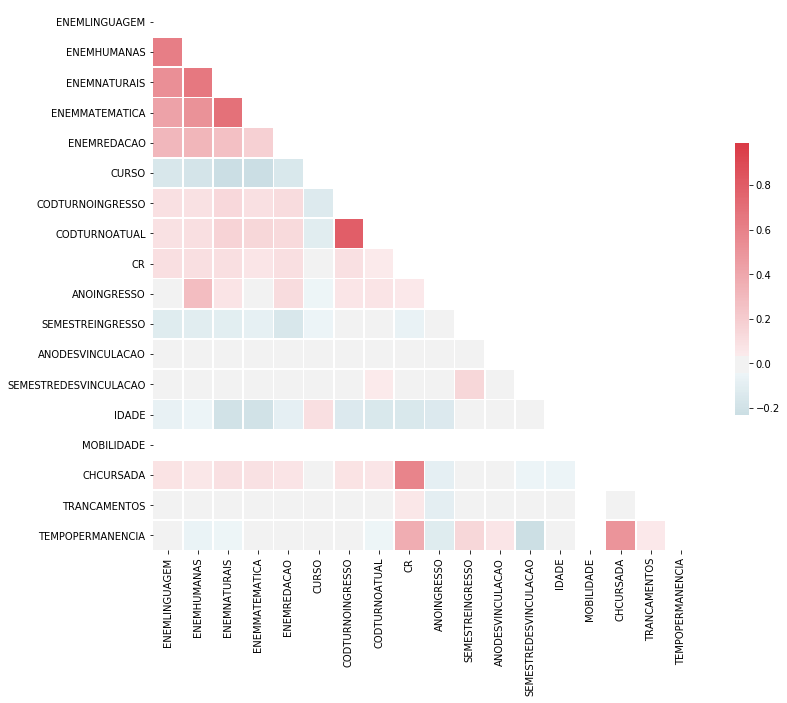

In [ ]:
# Compute the correlation matrix
corrEvad = dataEvadidos.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrEvad, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plb.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrEvad, mask=mask, cmap=cmap, vmax=.99, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plb.savefig('Graficos/matrix-correlation.pdf')
plb.show()

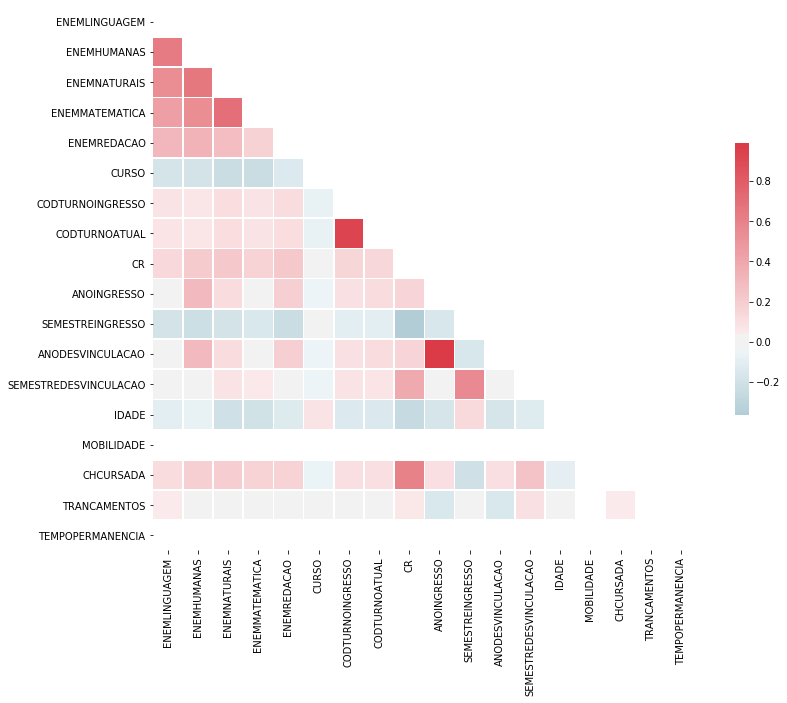

In [ ]:
# Compute the correlation matrix
corr1stYear = dataEvadFirstYear.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1stYear, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plb.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1stYear, mask=mask, cmap=cmap, vmax=.99, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plb.savefig('Graficos/matrix-correlation-1stYear.pdf')
plb.show()

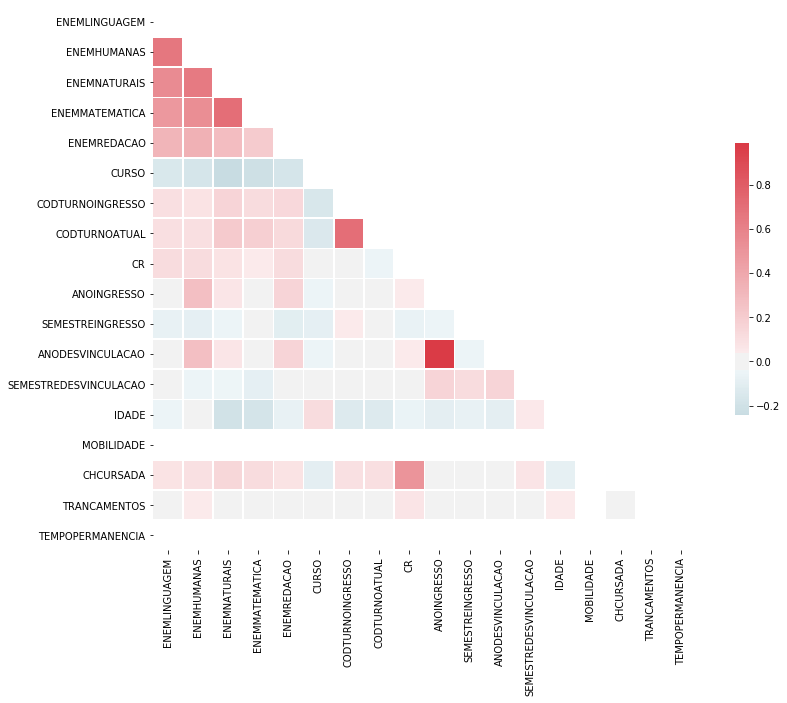

In [ ]:
# Compute the correlation matrix
corr4thYear = dataEvadFourthYear.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr4thYear, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plb.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr4thYear, mask=mask, cmap=cmap, vmax=.99, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plb.savefig('Graficos/matrix-correlation-4thYear.pdf')
plb.show()

In [ ]:
dataGraduados.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.00000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000
mean,605.936253,634.930735,586.338884,673.152069,737.818415,120.002246,6.531280,5.870388,8.158085,2012.88290,1.316651,2016.910812,1.546038,26.202117,0.000962,3473.638434,0.029195,5.027911
std,53.582514,72.913331,70.080016,97.414852,129.314830,145.403563,2.603949,2.389512,0.786658,0.64796,0.465245,0.815685,0.497956,5.370624,0.040046,965.259702,0.168379,0.794027
min,100.000000,0.000000,0.000000,100.000000,40.000000,1.000000,2.000000,2.000000,2.900000,2012.00000,1.000000,2012.000000,1.000000,21.000000,0.000000,1770.000000,0.000000,1.000000
25%,575.800000,592.000000,547.700000,620.600000,660.000000,22.000000,4.000000,4.000000,7.700000,2012.00000,1.000000,2016.000000,1.000000,24.000000,0.000000,2884.000000,0.000000,5.000000
50%,611.600000,641.100000,592.300000,680.300000,740.000000,49.000000,8.000000,8.000000,8.300000,2013.00000,1.000000,2017.000000,2.000000,24.000000,0.000000,3199.000000,0.000000,5.000000
75%,641.000000,685.700000,631.500000,738.100000,840.000000,222.000000,8.000000,8.000000,8.700000,2013.00000,2.000000,2017.000000,2.000000,26.000000,0.000000,3798.000000,0.000000,6.000000
max,754.800000,859.900000,812.000000,955.200000,1000.000000,562.000000,14.000000,8.000000,9.800000,2014.00000,2.000000,2018.000000,2.000000,70.000000,2.000000,9544.000000,1.000000,7.000000


# Correlation Matrix to Graduated Student

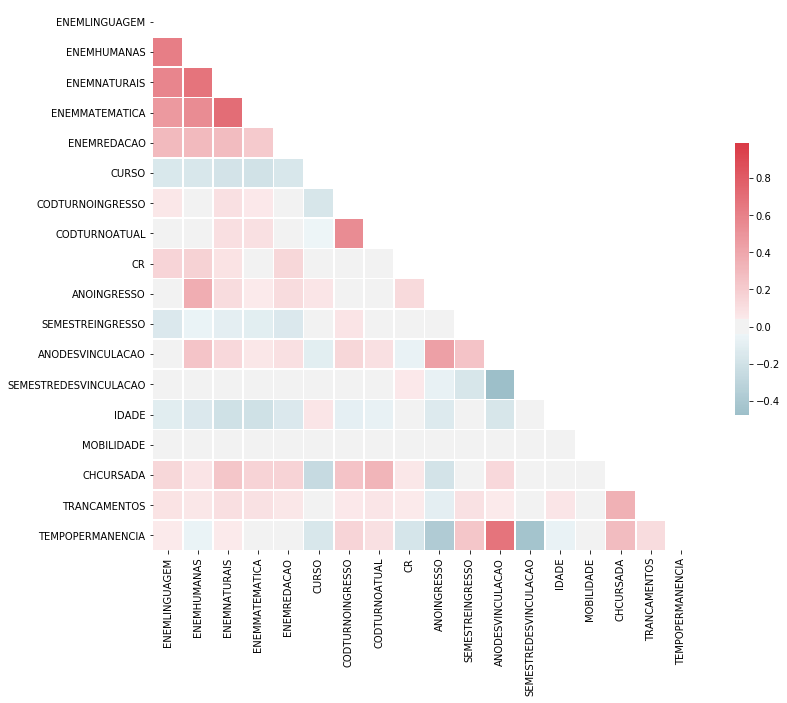

In [ ]:
# Compute the correlation matrix
dataGraduated = dataUnique[dataUnique.STATUSFORMACAO == "FORMADO"]
corr = dataGraduated.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plb.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.99, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plb.savefig('Graficos/matrix-correlation.pdf')
plb.show()

In [ ]:
dataUnique.groupby(['CURSO']).agg(['count', 'median'])

ENEMLINGUAGEM         ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
              count  median       count  ...       median            count median
CURSO                                    ...                                     
1               106  604.15         106  ...            0              106    4.0
2               222  620.40         222  ...            0              222    4.0
3               129  615.60         129  ...            0              129    4.0
4               228  622.85         228  ...            0              228    4.0
5                91  623.70          91  ...            0               91    4.0
...             ...     ...         ...  ...          ...              ...    ...
462             284  600.65         284  ...            0              284    4.0
502              51  555.50          51  ...            0               51    4.0
522              75  607.40          75  ...            0               75    4.0
523              71  585.70          71  ...            0               71    4.0
562             103  589.80         103  ...            0              103    4.0

[94 rows x 34 columns]

## Majority Class

#### Observation to Dropout and Conclusion

In [ ]:
dataUnique.groupby(['STATUSFORMACAO']).agg(['count', 'median'])

ENEMLINGUAGEM        ENEMHUMANAS  ... TRANCAMENTOS TEMPOPERMANENCIA       
                       count median       count  ...       median            count median
STATUSFORMACAO                                   ...                                     
EVADIDO                 9852  598.9        9852  ...            0             9852      3
FORMADO                 3117  611.6        3117  ...            0             3117      5

[2 rows x 36 columns]

In [ ]:
dataUnique[dataUnique.STATUSFORMACAO == "EVADIDO"]

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO
5,AC,662.7,632.7,618.4,680.9,680.0,62,8,8,INTEGRAL,2.20,2014,2,2018,2,22,NÃO DECLARADO,JARDIM ATLÂNTICO,74343500,GOIÂNIA,0,210,SOLTEIRO,0,5,F,EVADIDO
6,AC,530.5,564.2,465.2,442.4,680.0,62,8,8,INTEGRAL,5.50,2014,2,2018,2,22,NÃO DECLARADO,VILA CORTÊS,24890000,TANGUÁ,0,720,SOLTEIRO,0,5,F,EVADIDO
10,AC,577.5,558.6,362.2,472.0,520.0,62,8,8,INTEGRAL,7.41,2014,2,2015,2,27,NÃO DECLARADO,MUTONDO,24450400,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,EVADIDO
11,AC,586.6,641.9,575.8,708.5,820.0,263,4,4,NOTURNO,3.40,2013,1,2017,2,25,NÃO DECLARADO,CENTRO,24020069,NITERÓI,0,1124,SOLTEIRO,0,5,M,EVADIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259048,AC,580.5,570.1,477.0,451.7,940.0,21,8,8,INTEGRAL,4.25,2014,1,2014,1,22,BRANCA,ROCHA,24421345,SÃO GONÇALO,0,60,SOLTEIRO,0,1,F,EVADIDO
261786,AC,667.0,774.3,697.0,799.4,680.0,41,8,8,INTEGRAL,0.00,2014,1,2014,1,32,NÃO DECLARADO,BARRA DA TIJUCA,22793060,RIO DE JANEIRO,0,1643,SOLTEIRO,0,1,M,EVADIDO
264305,AC,568.2,665.7,592.2,648.9,660.0,20,4,4,NOTURNO,0.00,2014,2,2014,2,34,NÃO DECLARADO,VILA VALQUEIRE,21330320,RIO DE JANEIRO,0,136,SOLTEIRO,0,1,F,EVADIDO
265343,AC,645.1,667.6,668.8,800.5,680.0,20,4,4,NOTURNO,0.00,2014,2,2014,2,23,BRANCA,GLÓRIA,20241220,RIO DE JANEIRO,0,0,SOLTEIRO,0,1,M,EVADIDO


In [ ]:
dataUnique[dataUnique.STATUSFORMACAO == "FORMADO"]

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,FORMADO
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,FORMADO
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,FORMADO
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,FORMADO
7,AC,637.8,618.8,603.2,704.7,760.0,263,4,4,NOTURNO,7.70,2013,2,2017,2,25,NÃO DECLARADO,TIJUCA,20511400,RIO DE JANEIRO,0,3062,SOLTEIRO,0,5,F,FORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42899,AC,550.0,580.7,553.7,568.3,780.0,14,8,8,INTEGRAL,8.20,2013,2,2017,2,23,NÃO DECLARADO,VALE DO SOL,24813015,ITABORAÍ,0,2750,SOLTEIRO,0,5,M,FORMADO
45478,L3,548.8,569.5,477.9,324.2,560.0,36,4,4,NOTURNO,4.40,2013,2,2015,2,37,NEGRA,JÓQUEI II,28020302,CAMPOS DOS GOYTACAZES,0,3753,SOLTEIRO,0,3,F,FORMADO
49812,AC,606.8,701.7,622.6,856.8,720.0,20,4,4,NOTURNO,7.79,2013,2,2014,2,33,NEGRA,IMBOASSU,24465220,SÃO GONÇALO,0,2962,CASADO,1,2,M,FORMADO
57389,L1,629.7,621.0,475.6,678.3,740.0,23,4,4,NOTURNO,8.90,2013,2,2017,1,25,NÃO DECLARADO,PIRATININGA,24350051,NITERÓI,0,3000,SOLTEIRO,0,5,F,FORMADO


# Quantitativo Anual: Evadidos vs. Graduados

In [ ]:
print("Total de Alunos Evadidos no 1º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 1)]))
print("Total de Alunos Evadidos no 2º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 2)]))
print("Total de Alunos Evadidos no 3º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 3)]))
print("Total de Alunos Evadidos no 4º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 4)]))
print("Total de Alunos Evadidos no 5º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 5)]))
print("Total de Alunos Evadidos no 6º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 6)]))
print("Total de Alunos Evadidos no 7º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'EVADIDO') & (dataUnique.TEMPOPERMANENCIA == 7)]))

Total de Alunos Evadidos no 1º Ano:  3338
Total de Alunos Evadidos no 2º Ano:  1032
Total de Alunos Evadidos no 3º Ano:  1105
Total de Alunos Evadidos no 4º Ano:  1906
Total de Alunos Evadidos no 5º Ano:  1751
Total de Alunos Evadidos no 6º Ano:  614
Total de Alunos Evadidos no 7º Ano:  106


In [ ]:
print("Total de Alunos Graduados no 1º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 1)]))
print("Total de Alunos Graduados no 2º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 2)]))
print("Total de Alunos Graduados no 3º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 3)]))
print("Total de Alunos Graduados no 4º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 4)]))
print("Total de Alunos Graduados no 5º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 5)]))
print("Total de Alunos Graduados no 6º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 6)]))
print("Total de Alunos Graduados no 7º Ano: ", len(dataUnique[(dataUnique.STATUSFORMACAO == 'FORMADO') & (dataUnique.TEMPOPERMANENCIA == 7)]))

Total de Alunos Graduados no 1º Ano:  4
Total de Alunos Graduados no 2º Ano:  9
Total de Alunos Graduados no 3º Ano:  60
Total de Alunos Graduados no 4º Ano:  610
Total de Alunos Graduados no 5º Ano:  1630
Total de Alunos Graduados no 6º Ano:  748
Total de Alunos Graduados no 7º Ano:  56


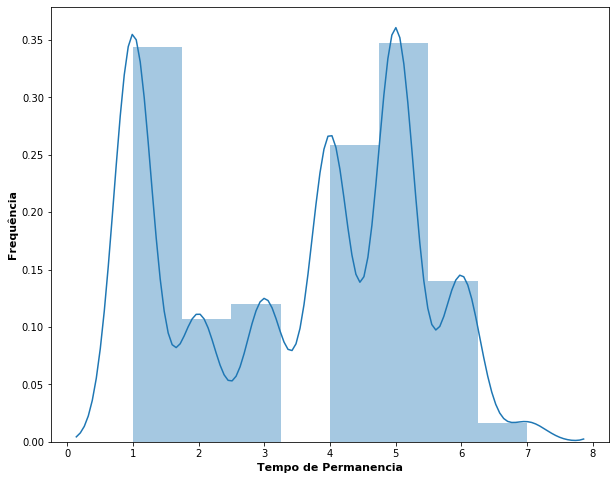

In [ ]:
plb.figure(figsize=(10,8))
sns.distplot(dataUnique.TEMPOPERMANENCIA, hist=True,bins=8)
plb.xlabel('Tempo de Permanencia', fontsize=11, fontweight='bold')
plb.ylabel('Frequência', fontsize=11, fontweight='bold')
plb.savefig('Graficos/hist-tempoevasao.pdf')
plb.show()

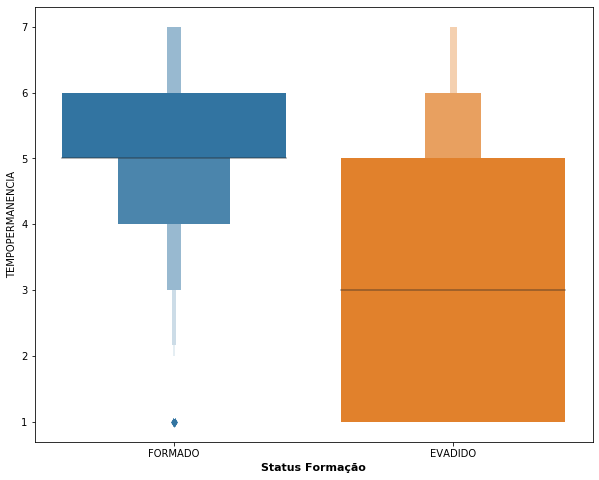

In [ ]:
plb.figure(figsize=(10,8))
sns.boxenplot(dataUnique.STATUSFORMACAO, dataUnique.TEMPOPERMANENCIA)
plb.xlabel('Tempo Permanência', fontsize=11, fontweight='bold')
plb.xlabel('Status Formação', fontsize=11, fontweight='bold')
plb.savefig('Graficos/boxen-stformacao.pdf')
plb.show()

In [ ]:
dataEvad = len(dataUnique.query('STATUSFORMACAO == "EVADIDO"'))
print("Dropout Percent: ", (dataEvad/total)*100)

dataForm = len(dataUnique.query('STATUSFORMACAO == "FORMADO"'))
print("Graduated Percent: ", (dataForm/total)*100)

dataAtivo = len(dataUnique.query('STATUSFORMACAO == "ATIVO"'))
print("Enrolled Percent: ", (dataAtivo/total)*100)


Dropout Percent:  75.96576451538284
Graduated Percent:  24.034235484617163
Enrolled Percent:  0.0


# Preprocessing to Data Visualization

In [ ]:
# Agora vamos remover os alunos ATIVOS do Dataset
dataUnique = dataUnique[dataUnique.STATUSFORMACAO != 'ATIVO']
print(dataUnique.shape)

(12969, 27)


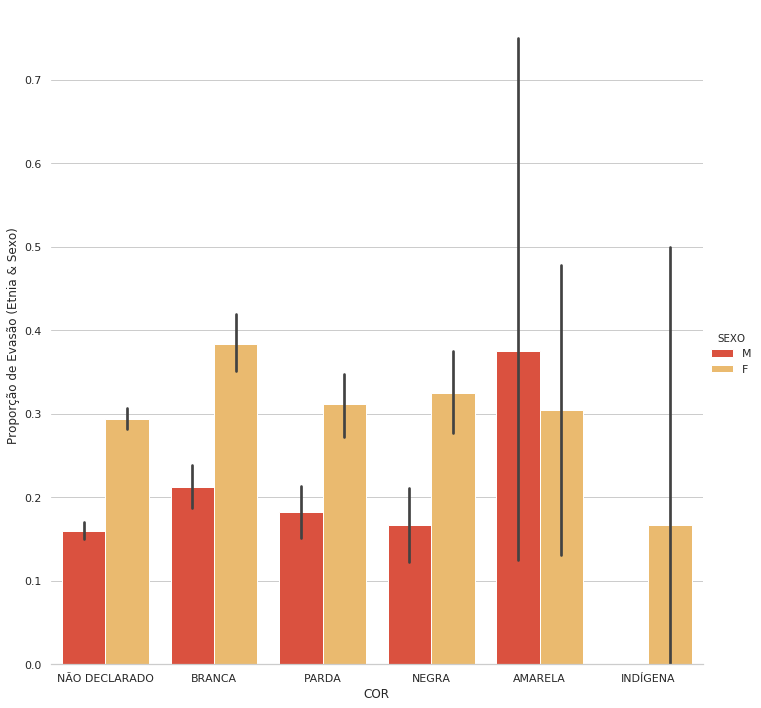

In [ ]:
sns.set(style="whitegrid")
g = sns.catplot(x="COR", y="STATUSFORMACAO", hue="SEXO", data=dataUnique, height=10, kind="bar", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Etnia & Sexo)");

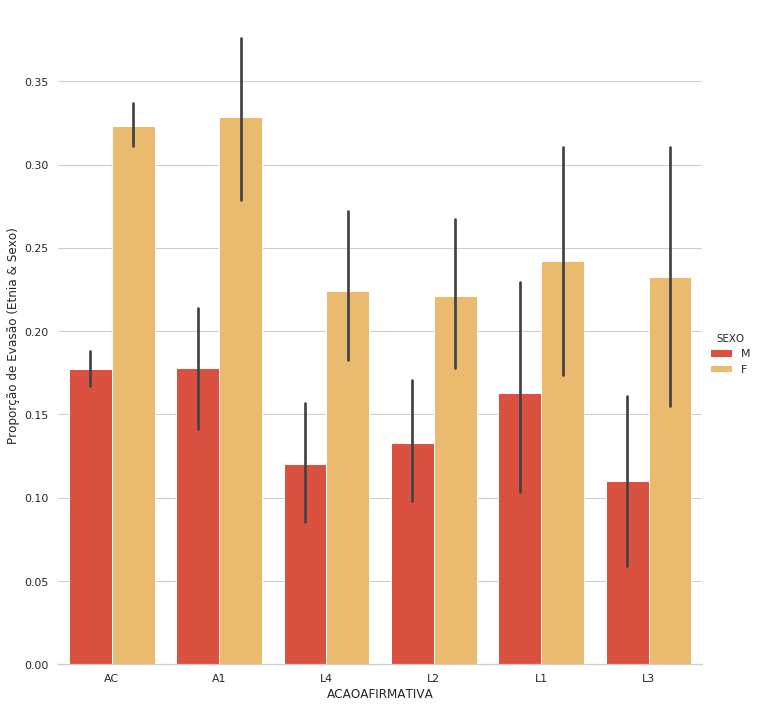

In [ ]:
sns.set(style="whitegrid")
g = sns.catplot(x="ACAOAFIRMATIVA", y="STATUSFORMACAO", hue="SEXO", data=dataUnique, height=10, kind="bar", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Etnia & Sexo)");

# Encoded to classification labels

In [ ]:
for c in dataUnique.columns:
    if dataUnique[c].dtype == 'object' and c == 'STATUSFORMACAO':
        lbl = LabelEncoder()
        lbl.fit(list(dataUnique[c].values))
        dataUnique[c] = lbl.transform(list(dataUnique[c].values))

In [ ]:
# Efetuando Mapeamento Categórico
dataUnique.head()

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,TURNOATUAL,CR,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,COR,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,AC,605.8,743.4,706.6,840.1,960.0,41,8,8,INTEGRAL,8.00,2013,1,2018,1,24,NÃO DECLARADO,JARDIM ICARAÍ,24220330,NITERÓI,0,4498,SOLTEIRO,0,6,M,1
1,AC,616.4,602.8,646.4,696.5,840.0,243,8,8,INTEGRAL,7.30,2014,1,2018,1,22,NÃO DECLARADO,VILA JACI,12211370,SÃO JOSÉ DOS CAMPOS,0,2775,SOLTEIRO,0,5,M,1
2,AC,636.2,654.1,617.2,760.0,720.0,244,8,8,INTEGRAL,8.80,2013,1,2017,2,24,BRANCA,BELA VISTA,28623,NOVA FRIBURGO,0,4300,SOLTEIRO,0,5,F,1
3,A1,559.1,568.1,522.0,587.7,700.0,3,4,4,NOTURNO,7.20,2013,2,2018,1,24,NÃO DECLARADO,CAXITO,21545160,RIO DE JANEIRO,0,3274,SOLTEIRO,0,6,F,1
4,AC,545.4,560.9,508.2,528.0,600.0,62,8,8,INTEGRAL,7.06,2014,2,2015,1,24,NÃO DECLARADO,BARRO VERMELHO,24412330,SÃO GONÇALO,0,330,SOLTEIRO,0,2,F,0


## Grade Point Average (GPA)

#### Detailled statistics to GPA

In [ ]:
dataUnique.CR.describe()

count    12969.000000
mean         4.622602
std          3.137774
min          0.000000
25%          1.700000
50%          4.700000
75%          7.700000
max         10.000000
Name: CR, dtype: float64

## Ethnicity

In [ ]:
dataUnique.groupby(['COR']).agg(['count','mean', 'median'])

ENEMLINGUAGEM                      ... STATUSFORMACAO                 
                      count        mean  median  ...          count      mean median
COR                                              ...                                
AMARELA                  31  593.832258  599.20  ...             31  0.322581      0
BRANCA                 1850  598.630486  603.50  ...           1850  0.296216      0
INDÍGENA                 12  573.025000  584.60  ...             12  0.083333      0
NEGRA                   632  574.451741  582.20  ...            632  0.251582      0
NÃO DECLARADO          9210  598.701357  604.35  ...           9210  0.227579      0
PARDA                  1234  582.901297  587.60  ...           1234  0.245543      0

[6 rows x 57 columns]

In [ ]:
dataUnique.groupby(['ACAOAFIRMATIVA']).agg(['count','mean', 'median'])

ENEMLINGUAGEM              ... STATUSFORMACAO       
                       count        mean  ...           mean median
ACAOAFIRMATIVA                            ...                      
A1                       770  587.832597  ...       0.248052      0
AC                     10313  599.752584  ...       0.251139      0
L1                       296  576.099662  ...       0.206081      0
L2                       694  573.393228  ...       0.177233      0
L3                       234  591.935470  ...       0.170940      0
L4                       662  580.501360  ...       0.169184      0

[6 rows x 57 columns]

## Gender

In [ ]:
dataUnique.groupby(['SEXO']).agg(['count','mean', 'median'])

ENEMLINGUAGEM                      ... STATUSFORMACAO                 
             count        mean  median  ...          count      mean median
SEXO                                    ...                                
F             6514  595.183037  601.55  ...           6514  0.309794      0
M             6455  596.765670  601.70  ...           6455  0.170256      0

[2 rows x 57 columns]

## Age

In [ ]:
dataUnique.groupby(['IDADE']).agg(['count','mean', 'median'])

ENEMLINGUAGEM                      ... STATUSFORMACAO                 
              count        mean  median  ...          count      mean median
IDADE                                    ...                                
21               67  596.326866  593.20  ...             67  0.134328    0.0
22             1022  600.688552  603.20  ...           1022  0.134051    0.0
23             2580  600.177481  604.25  ...           2580  0.238372    0.0
24             2762  598.997321  602.70  ...           2762  0.303403    0.0
25             1669  594.985201  602.50  ...           1669  0.303176    0.0
26              934  592.989400  602.60  ...            934  0.262313    0.0
27              644  592.454503  596.70  ...            644  0.253106    0.0
28              472  594.781568  602.30  ...            472  0.254237    0.0
29              358  593.198603  601.60  ...            358  0.215084    0.0
30              324  597.975617  601.60  ...            324  0.209877    0.0
31              248  596.563710  604.05  ...            248  0.169355    0.0
32              237  595.236709  605.90  ...            237  0.147679    0.0
33              201  594.547761  606.10  ...            201  0.169154    0.0
34              164  589.742073  595.65  ...            164  0.146341    0.0
35              136  591.815441  598.40  ...            136  0.095588    0.0
36              109  588.517431  589.10  ...            109  0.183486    0.0
37              112  599.816964  604.35  ...            112  0.205357    0.0
38               83  588.496386  590.10  ...             83  0.180723    0.0
39               82  591.045122  587.95  ...             82  0.207317    0.0
40               68  576.320588  581.50  ...             68  0.191176    0.0
41               53  600.973585  606.30  ...             53  0.113208    0.0
42               55  589.292727  590.50  ...             55  0.181818    0.0
43               36  577.019444  583.85  ...             36  0.222222    0.0
44               45  570.500000  574.60  ...             45  0.155556    0.0
45               44  574.150000  576.55  ...             44  0.136364    0.0
46               50  592.348000  594.15  ...             50  0.140000    0.0
47               35  572.105714  584.70  ...             35  0.142857    0.0
48               25  591.772000  600.00  ...             25  0.200000    0.0
49               29  559.496552  573.50  ...             29  0.241379    0.0
50               44  573.490909  568.95  ...             44  0.181818    0.0
51               41  580.331707  585.70  ...             41  0.146341    0.0
52               33  562.890909  574.00  ...             33  0.121212    0.0
53               29  580.482759  592.70  ...             29  0.137931    0.0
54               30  586.943333  587.55  ...             30  0.133333    0.0
55               18  577.483333  587.65  ...             18  0.055556    0.0
56               17  578.276471  571.70  ...             17  0.000000    0.0
57               18  573.561111  569.25  ...             18  0.166667    0.0
58               19  584.489474  588.20  ...             19  0.315789    0.0
59               14  565.692857  570.20  ...             14  0.071429    0.0
60               12  588.041667  591.15  ...             12  0.083333    0.0
61                8  591.375000  592.60  ...              8  0.250000    0.0
62               12  570.908333  571.05  ...             12  0.000000    0.0
63                8  539.162500  559.65  ...              8  0.000000    0.0
64                6  505.100000  520.05  ...              6  0.166667    0.0
65                3  616.666667  642.90  ...              3  0.000000    0.0
66                3  511.100000  461.00  ...              3  0.000000    0.0
67                2  574.750000  574.75  ...              2  0.000000    0.0
69                1  587.500000  587.50  ...              1  0.000000    0.0
70                2  599.400000  599.40  ...              2  0.500000    0.5
71

# Data Visualization

#### GPA Distribuition

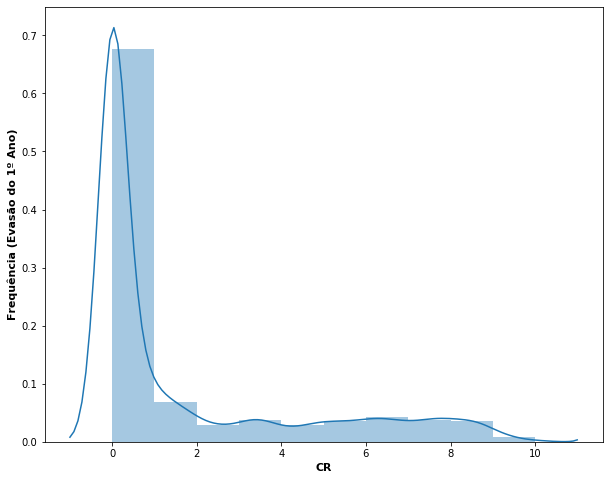

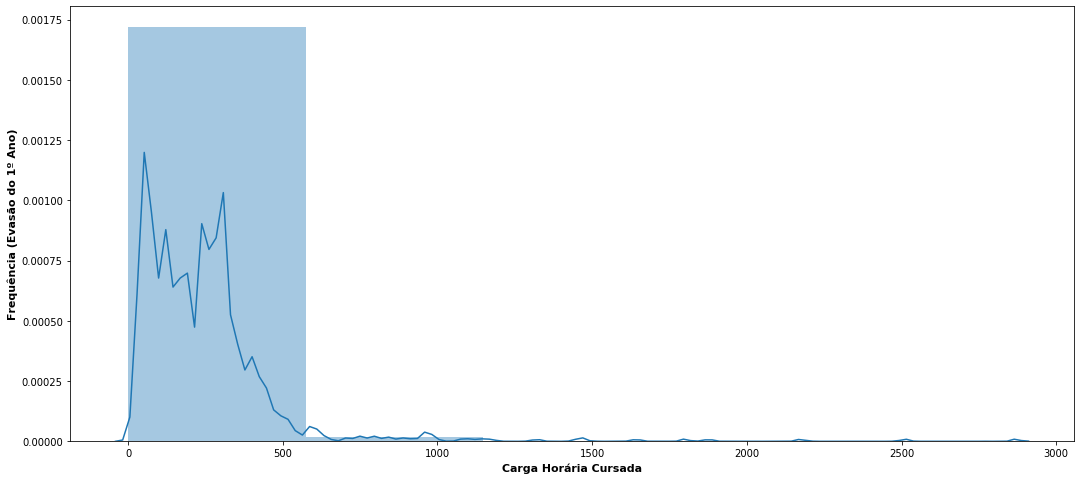

In [ ]:
plb.figure(figsize=(10,8))
sns.distplot(dataEvadFirstYear.CR, hist=True,bins=10)
plb.xlabel('CR', fontsize=11, fontweight='bold')
plb.ylabel('Frequência (Evasão do 1º Ano)', fontsize=11, fontweight='bold')
plb.savefig('Graficos/histgram1stYear-gpa.pdf')
plb.show()

sns.distplot(dataEvadFirstYear.CHCURSADA, hist=True,bins=5)
plb.xlabel('Carga Horária Cursada', fontsize=11, fontweight='bold')
plb.ylabel('Frequência (Evasão do 1º Ano)', fontsize=11, fontweight='bold')
plb.savefig('Graficos/histgram1stYear-chcursada.pdf')
plb.show()

1) Nesse caso apresentado acima, é identificado que aproximadamente 43% dos estudantes, possuem CR (GPA) abaixo de 4.0. Com isso, pode-se concluir que esse percentual de 43% dos alunos evadiram no primeiro ano de curso. 

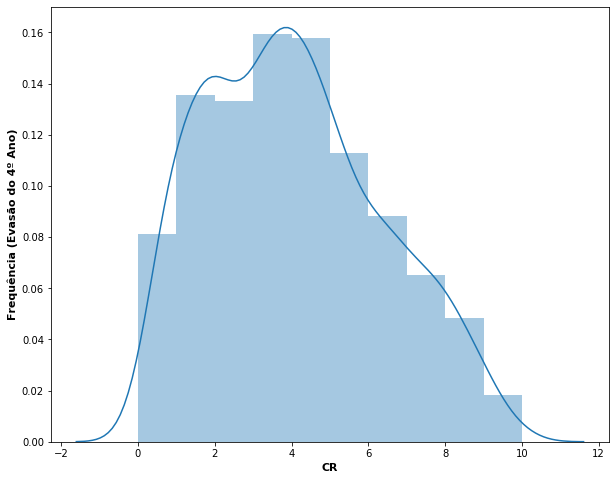

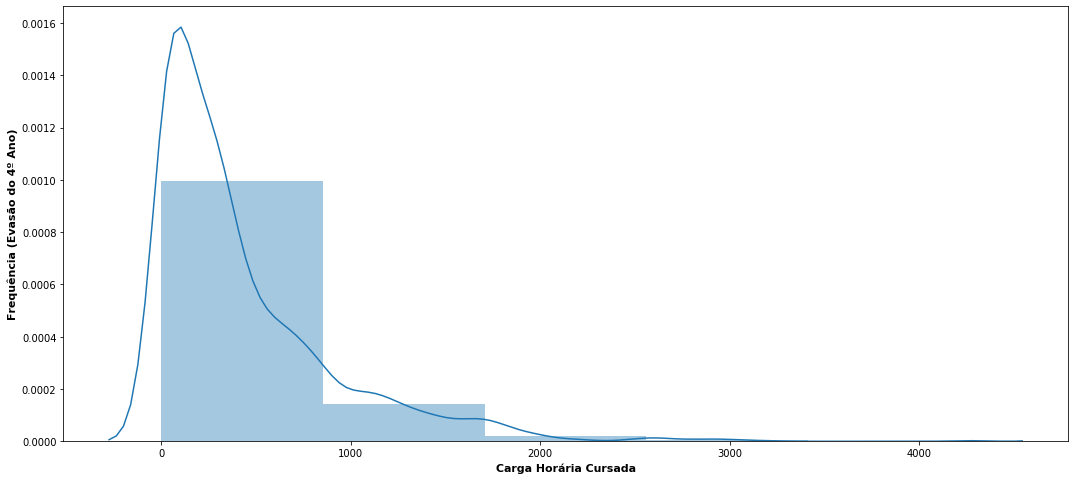

In [ ]:
plb.figure(figsize=(10,8))
sns.distplot(dataEvadFourthYear.CR, hist=True,bins=10)
plb.xlabel('CR', fontsize=11, fontweight='bold')
plb.ylabel('Frequência (Evasão do 4º Ano)', fontsize=11, fontweight='bold')
plb.savefig('Graficos/histgram1stYear-gpa.pdf')
plb.show()

sns.distplot(dataEvadFourthYear.CHCURSADA, hist=True,bins=5)
plb.xlabel('Carga Horária Cursada', fontsize=11, fontweight='bold')
plb.ylabel('Frequência (Evasão do 4º Ano)', fontsize=11, fontweight='bold')
plb.savefig('Graficos/histgram1stYear-chcursada.pdf')
plb.show()

#### Ethnicity Distribuition to Academic Performance

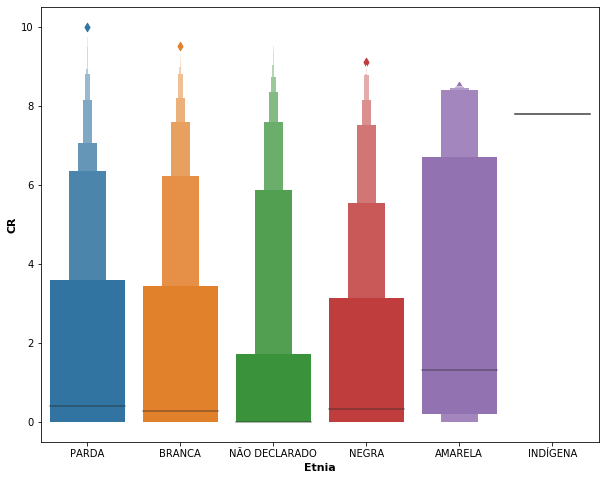

In [ ]:
plb.figure(figsize=(10,8))
sns.boxenplot(dataEvadFirstYear.COR, dataEvadFirstYear.CR)
plb.xlabel('Etnia', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.savefig('Graficos/boxenplot-cor-cr.pdf')
plb.show()

2) No boxplot apresentado na Figura \ref{fig:ethnia-gpa} é apresentado o CR (GPA) relacionado com as Etnias dos alunos. É percebido que os alunos brancos e pardos possuem rendimento um pouco mais alto que alunos negros e indígenas, se for comparada a mediana de CR (GPA). 

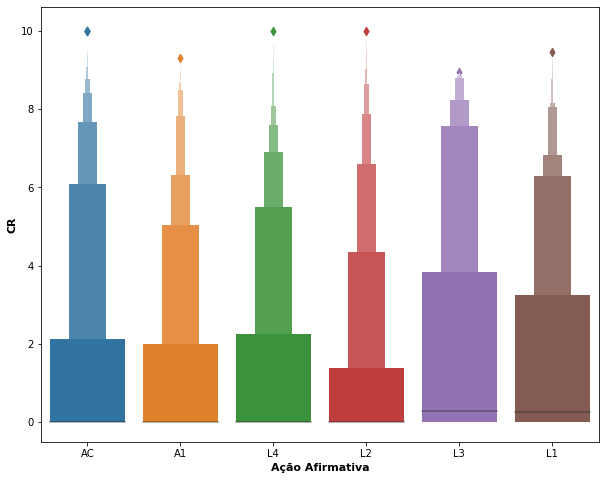

In [ ]:
#### Social Programs Visualization to Academic Performance
plb.figure(figsize=(10,8))
sns.boxenplot(dataEvadFirstYear.ACAOAFIRMATIVA, dataEvadFirstYear.CR)
plb.xlabel('Ação Afirmativa', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.savefig('Graficos/boxenplot-acao-cr.pdf')
plb.show()

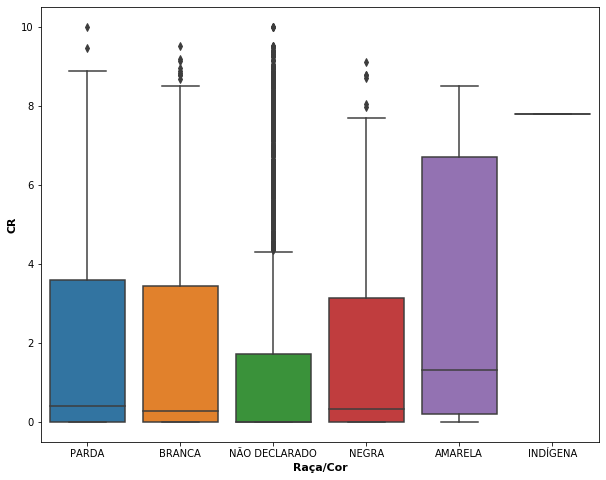

In [ ]:
#### Ethnicity vs GPA Boxplot 
plb.figure(figsize=(10,8))
sns.boxplot(dataEvadFirstYear.COR, dataEvadFirstYear.CR)
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.savefig('Graficos/boxplot-ethnia-gpa.pdf')
plb.show()

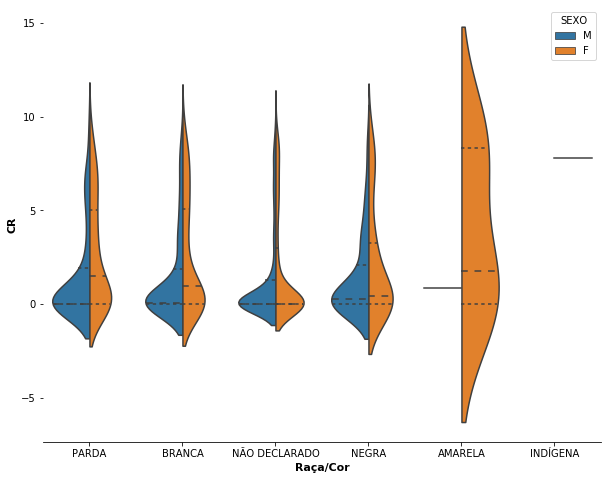

In [ ]:
#### GPA vs Gender vs Ethncity in Violinplot

# Draw a nested violinplot and split the violins for easier comparison
plb.figure(figsize=(10,8))
sns.violinplot(x="COR", y="CR", hue="SEXO", split=True, inner="quart", data=dataEvadFirstYear)
sns.despine(left=True)
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.savefig('Graficos/boxenplotcorcrsexo.pdf')
plb.show()

# Correlation Heatmap

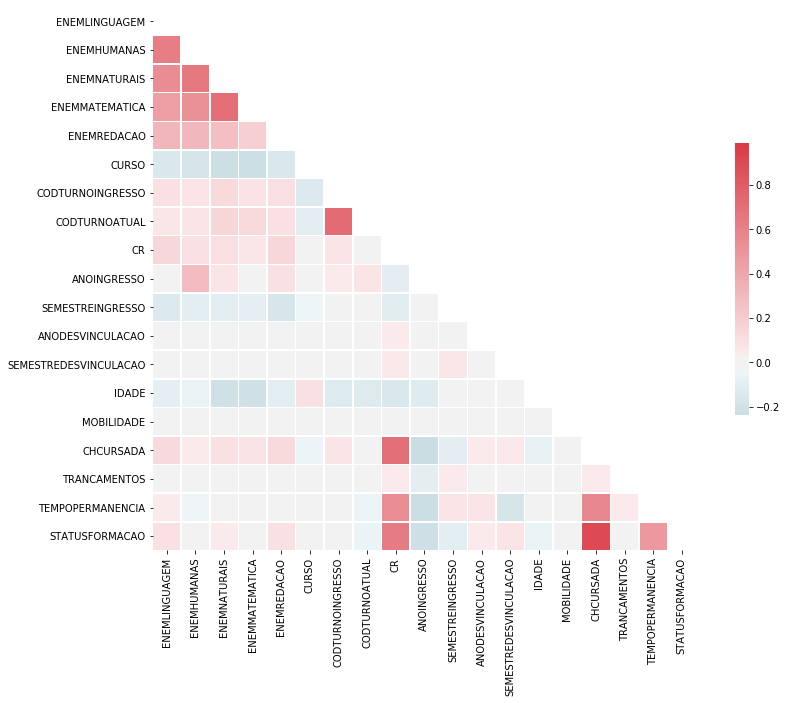

In [ ]:
# Compute the correlation matrix
corr = dataUnique.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plb.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.99, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plb.savefig('Graficos/matrix-correlation.pdf')
plb.show()

# Statistics Tests - ANOVA and Tukey

A **Análise de Variância (``ANOVA``)** testa se a média de alguma variável numérica difere-se nos níveis de significância de uma variável categórica. Essencialmente, responde à pergunta: algum dos meios do grupo difere um do outro? 

Não entraremos nos detalhes da realização de uma ANOVA à mão, pois ela envolve mais cálculos do que o *teste T*, 
mas o processo é semelhante: você passa por vários cálculos para chegar a uma estatística de teste e depois 
compara a estatística de teste para um valor crítico baseado em uma distribuição de probabilidade. 
No caso da ANOVA, você usa a **``distribuição f``**.

A **biblioteca ``scipy``** tem uma função para realizar testes ANOVA unidirecionais chamados ``scipy.stats.f_oneway ()``. Vamos gerar uma certa idade de eleitor e dados demográficos e usar a ANOVA para comparar as idades médias entre os grupos:

### Comparação de médias: `Teste de Turking`

In [ ]:
print(pairwise_tukeyhsd(dataEvadFirstYear.ANOINGRESSO, dataEvadFirstYear.COR))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
      AMARELA        BRANCA   0.1734    0.9 -0.6674  1.0143  False
      AMARELA      INDÍGENA  -0.3333    0.9   -2.54  1.8734  False
      AMARELA         NEGRA   0.1263    0.9 -0.7277  0.9803  False
      AMARELA NÃO DECLARADO  -0.0843    0.9 -0.9193  0.7507  False
      AMARELA         PARDA   0.2957    0.9 -0.5484  1.1398  False
       BRANCA      INDÍGENA  -0.5068    0.9 -2.5526   1.539  False
       BRANCA         NEGRA  -0.0471    0.9 -0.2592   0.165  False
       BRANCA NÃO DECLARADO  -0.2577  0.001 -0.3714 -0.1441   True
       BRANCA         PARDA   0.1223 0.2991 -0.0455    0.29  False
     INDÍGENA         NEGRA   0.4597    0.9 -1.5916  2.5109  False
     INDÍGENA NÃO DECLARADO    0.249    0.9 -1.7944  2.2924  False
     INDÍGENA         PARDA    0.629    0.9 -1.4181  2.6762  F

In [ ]:
print(pairwise_tukeyhsd(dataEvadFirstYear.CR, dataEvadFirstYear.COR))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
      AMARELA        BRANCA  -1.3262 0.8094  -4.4481  1.7958  False
      AMARELA      INDÍGENA   4.5433 0.5959  -3.6502 12.7368  False
      AMARELA         NEGRA  -1.4529 0.7544  -4.6238   1.718  False
      AMARELA NÃO DECLARADO  -1.6936 0.6095   -4.794  1.4069  False
      AMARELA         PARDA  -1.2517 0.8512  -4.3858  1.8824  False
       BRANCA      INDÍGENA   5.8695 0.2364  -1.7265 13.4655  False
       BRANCA         NEGRA  -0.1267    0.9  -0.9141  0.6607  False
       BRANCA NÃO DECLARADO  -0.3674 0.1293  -0.7895  0.0547  False
       BRANCA         PARDA   0.0745    0.9  -0.5484  0.6974  False
     INDÍGENA         NEGRA  -5.9962 0.2176 -13.6124    1.62  False
     INDÍGENA NÃO DECLARADO  -6.2369 0.1767 -13.8241  1.3503  False
     INDÍGENA         PARDA   -5.795 0.2502  -13

In [ ]:
print(pairwise_tukeyhsd(dataEvadFirstYear.CHCURSADA, dataEvadFirstYear.SEXO))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     F      M -16.1249 0.007 -27.8443 -4.4054   True
----------------------------------------------------


### Comparação de médias: ``MultiComparison``

<Figure size 720x576 with 0 Axes>

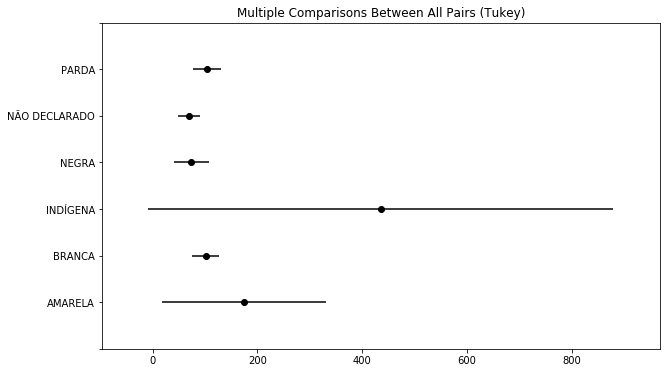

In [ ]:
mc = MultiComparison(dataEvadFirstYear.CHCURSADA, dataEvadFirstYear.COR)
plb.figure(figsize=(10,8))
mc.tukeyhsd().plot_simultaneous()
plb.savefig('Graficos/anova-multicomparions.pdf')
plb.show()

In [ ]:
print("--- %s seconds ---" % (time.time() - starTime))